# **Projet 5 - Segmentez des clients d’un site e-commerce**

# **La problématique**

 **L'objectif de ce projet est de :**

- Créer une segmentation des clients, comprendre les différents types d'utilisateurs grâce à leur comportement et à leur données personnelles
 - Fournir une description actionable de la segmentation et de sa logique sous-jacente pour une utilisation optimale
 - Fournir une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps
 
**Acquisition de données**

- Le client nous fournit une base de données anonymisée comportant des informations sur l'historique de commandes, les produits achetés, les commentaires de satisfaction et la localisation des clients depuis janvier 2017.

**Base de données (Anonymisée):**

   - Informations sur l’historique de commandes
   - Produits achetés
   - Commentaires de satisfaction
   - Localisation des clients depuis janvier 2017

**Infos pertinantes à considérer:**

   - Seuls 3 % des clients du fichier de données ont réalisé plusieurs commandes
   - La segmentation doit pouvoir différencier les bons et moins bons clients en termes de commandes et de satisfaction
   - Le code doit respecter la convention PEP8



**Convention PEP8 (Python Enhancement Proposal 8)**

**Convention de codage pour le langage de programmation Python:**

   - Indentation: Utiliser 4 espaces par niveau d'indentation. Les tabulations ne sont pas recommandées.
   - Longueur de ligne: Chaque ligne de code ne doit pas dépasser 79 caractères.
   - Espaces blancs: Éviter les espaces blancs inutiles à la fin des lignes ou sur les lignes vides.
   - Importations: Les modules doivent être importés sur des lignes séparées et ils doivent être placés en haut du fichier.
   - Commentaires: Ils doivent être complets et compréhensibles. Ils doivent être insérés sur une nouvelle ligne si possible.
   - Nommage des variables: Les noms des variables doivent être descriptifs, en minuscules, avec des mots séparés par des underscores si nécessaire.




**Notebooks**

   - **Notebook 1:** Analyse exploratoire
        - Cleaning
        - Feature engineering
        - Exploration
        
   - **Notebook 2:** Essais des différentes approches de modélisation (segmentation)
        - Plusieurs modèles de segmentation à considérer
        - Recherche des bons hyperparamètres
        
   - **Notebook 3:**
        - Simulations pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation



# **Partie 1 : Connaissance des données**

# 1.1 Importations des librairies

In [1]:
#------------------------------------------
# projet 5 : Segmentez des clients d’un site e-commerce
# Auteur : Mohamed MERAH
# Date: Janvier 2024
# OpenClassrooms 2023-2024
#-------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import zipfile
from termcolor import colored
import missingno
import sklearn
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from datetime import datetime
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

 # 1.2 Chargement du jeu de données

In [2]:
PathZipPr2= "C:/Users/misso/Desktop/Formation_DS_23_24_MERAH/2-Projet/5- Projet 5/2-Ressources/archive.zip"
PathDeZipPr2= "C:/Users/misso/Desktop/Formation_DS_23_24_MERAH/2-Projet/5- Projet 5/2-Ressources/archive"
#C:\Users\misso\Desktop\Formation_DS_23_24_MERAH\2-Projet\5- Projet 5\2-Ressources
zip =zipfile.ZipFile(PathZipPr2,"r")

with zip as z:
    z.extractall(PathDeZipPr2)
    database_name=z.namelist()
database_name

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [3]:
database_name = ['.'.join(ext.split('.')[:-1]) for ext in database_name]

In [4]:
database_name

['olist_customers_dataset',
 'olist_geolocation_dataset',
 'olist_order_items_dataset',
 'olist_order_payments_dataset',
 'olist_order_reviews_dataset',
 'olist_orders_dataset',
 'olist_products_dataset',
 'olist_sellers_dataset',
 'product_category_name_translation']

In [5]:
#database_name = ['EdStatsData','EdStatsCountry','EdStatsSeries','EdStatsCountry-Series','EdStatsFootNote']
Path='C:/Users/misso/Desktop/Formation_DS_23_24_MERAH/2-Projet/5- Projet 5/2-Ressources/archive/'
extension='.csv'
database=[]
  
for i in range(len(database_name)):
    print(' -------------------------------------------------------------------------------------------')
    print ('Importation de la base ', colored(database_name[i], 'blue', attrs=['bold']),':')
    data = pd.read_csv(Path + database_name[i] + extension)
    data = pd.DataFrame(data)
    database.append(data)
    print (' Les 5 premèeres lignes de cette base : ')
    display(data.head(5))
    
customers_dataset = database[0]
geolocation_dataset = database[1]
order_items_dataset = database[2]
order_payments_dataset =database[3]
order_reviews_dataset = database[4]
orders_dataset = database[5]
products_dataset = database[6]
sellers_dataset = database[7]
product_category_name_translation =database[8]

 -------------------------------------------------------------------------------------------
Importation de la base  olist_customers_dataset :
 Les 5 premèeres lignes de cette base : 


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


 -------------------------------------------------------------------------------------------
Importation de la base  olist_geolocation_dataset :
 Les 5 premèeres lignes de cette base : 


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


 -------------------------------------------------------------------------------------------
Importation de la base  olist_order_items_dataset :
 Les 5 premèeres lignes de cette base : 


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


 -------------------------------------------------------------------------------------------
Importation de la base  olist_order_payments_dataset :
 Les 5 premèeres lignes de cette base : 


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


 -------------------------------------------------------------------------------------------
Importation de la base  olist_order_reviews_dataset :
 Les 5 premèeres lignes de cette base : 


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


 -------------------------------------------------------------------------------------------
Importation de la base  olist_orders_dataset :
 Les 5 premèeres lignes de cette base : 


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


 -------------------------------------------------------------------------------------------
Importation de la base  olist_products_dataset :
 Les 5 premèeres lignes de cette base : 


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


 -------------------------------------------------------------------------------------------
Importation de la base  olist_sellers_dataset :
 Les 5 premèeres lignes de cette base : 


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


 -------------------------------------------------------------------------------------------
Importation de la base  product_category_name_translation :
 Les 5 premèeres lignes de cette base : 


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [6]:
order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


# 1.3 Description des données

In [7]:
database_name =['customers_dataset','geolocation_dataset','order_items_dataset','order_payments_dataset',
 'order_reviews_dataset','orders_dataset','products_dataset','sellers_dataset','product_category_name_translation']
                 

Description_Edstats=[]
i=0
for i in range(9):
    desc_base=[]
    print ('Analyse de la base ', colored(database_name[i], 'red', attrs=['bold']),':')
    
    print('1) ------------------------------------------------------------------------')
    print ('Quelques informations sur la base en utilisant la fonction info():\n')
    print (database[i].info())
    
    
    print('2) ------------------------------------------------------------------------')
    print ('Il y a ', database[i].shape[0], 'lignes et ', database[i].shape[1],'colonnes dans la base ',database_name[i])
    desc_base.append(database[i].shape[1])
    desc_base.append(database[i].shape[0])
    
    # données manquantes par colonnes
    print('3) ------------------------------------------------------------------------')
    print('Le nombre de données manquantes par colonnes : \n',database[i].isna().sum())
    # données manquantes dans toute la base
    
    print('4) ------------------------------------------------------------------------')
    print('Le nombre total de données manquantes est : \n',database[i].isna().sum().sum())
    desc_base.append(database[i].isna().sum().sum())

    # pourcentage des données manquantes 
    print('5) ------------------------------------------------------------------------')
    print('Le pourcentage des données manquantes est : \n',round(database[i].isna().mean().mean()*100,2),'%')
    desc_base.append(round(database[i].isna().mean().mean()*100,2))
    
    
    #Nombre de Colonnes dupliquées
    print('6) ------------------------------------------------------------------------')
    print("Nombre de Colonnes dupliquées :",database[i].columns.duplicated().sum())
    desc_base.append(database[i].columns.duplicated().sum())
        
    #Identification des lignes vides
    print('7) ------------------------------------------------------------------------')
    print("Nombre de lignes vides :",database[i].isna().all(axis=1).sum())
    desc_base.append(database[i].isna().all(axis=1).sum())
    

    print(colored('*******************************************************************************************************', 'blue'))
    
    Description_Edstats.append(desc_base)
    
    

Analyse de la base  customers_dataset :
1) ------------------------------------------------------------------------
Quelques informations sur la base en utilisant la fonction info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
2) ------------------------------------------------------------------------
Il y a  99441 lignes et  5 colonnes dans la base  customers_dataset
3) ------------------------------------------------------------------------
Le nombre de données manquantes par colonnes : 
 custom

Le nombre total de données manquantes est : 
 145903
5) ------------------------------------------------------------------------
Le pourcentage des données manquantes est : 
 21.01 %
6) ------------------------------------------------------------------------
Nombre de Colonnes dupliquées : 0
7) ------------------------------------------------------------------------
Nombre de lignes vides : 0
*******************************************************************************************************
Analyse de la base  orders_dataset :
1) ------------------------------------------------------------------------
Quelques informations sur la base en utilisant la fonction info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                  

In [8]:
Dataset_Edstats=pd.DataFrame(Description_Edstats,columns=
['Nbre Colonnes','Nobre Lignes','Nbre donnees manquantes','% donnees manquantes',
 'Nbre Colonnes Dupliquées','Nombre de lignes vides' ],index=database_name)
print('Tableau récapitulatif')
Dataset_Edstats

Tableau récapitulatif


,Nbre Colonnes,Nobre Lignes,Nbre donnees manquantes,% donnees manquantes,Nbre Colonnes Dupliquées,Nombre de lignes vides
customers_dataset,5,99441,0,0.00,0,0
geolocation_dataset,5,1000163,0,0.00,0,0
order_items_dataset,7,112650,0,0.00,0,0
order_payments_dataset,5,103886,0,0.00,0,0
order_reviews_dataset,7,99224,145903,21.01,0,0
orders_dataset,8,99441,4908,0.62,0,0
products_dataset,9,32951,2448,0.83,0,0
sellers_dataset,4,3095,0,0.00,0,0
product_category_name_translation,2,71,0,0.00,0,0


# 1.4 Merge

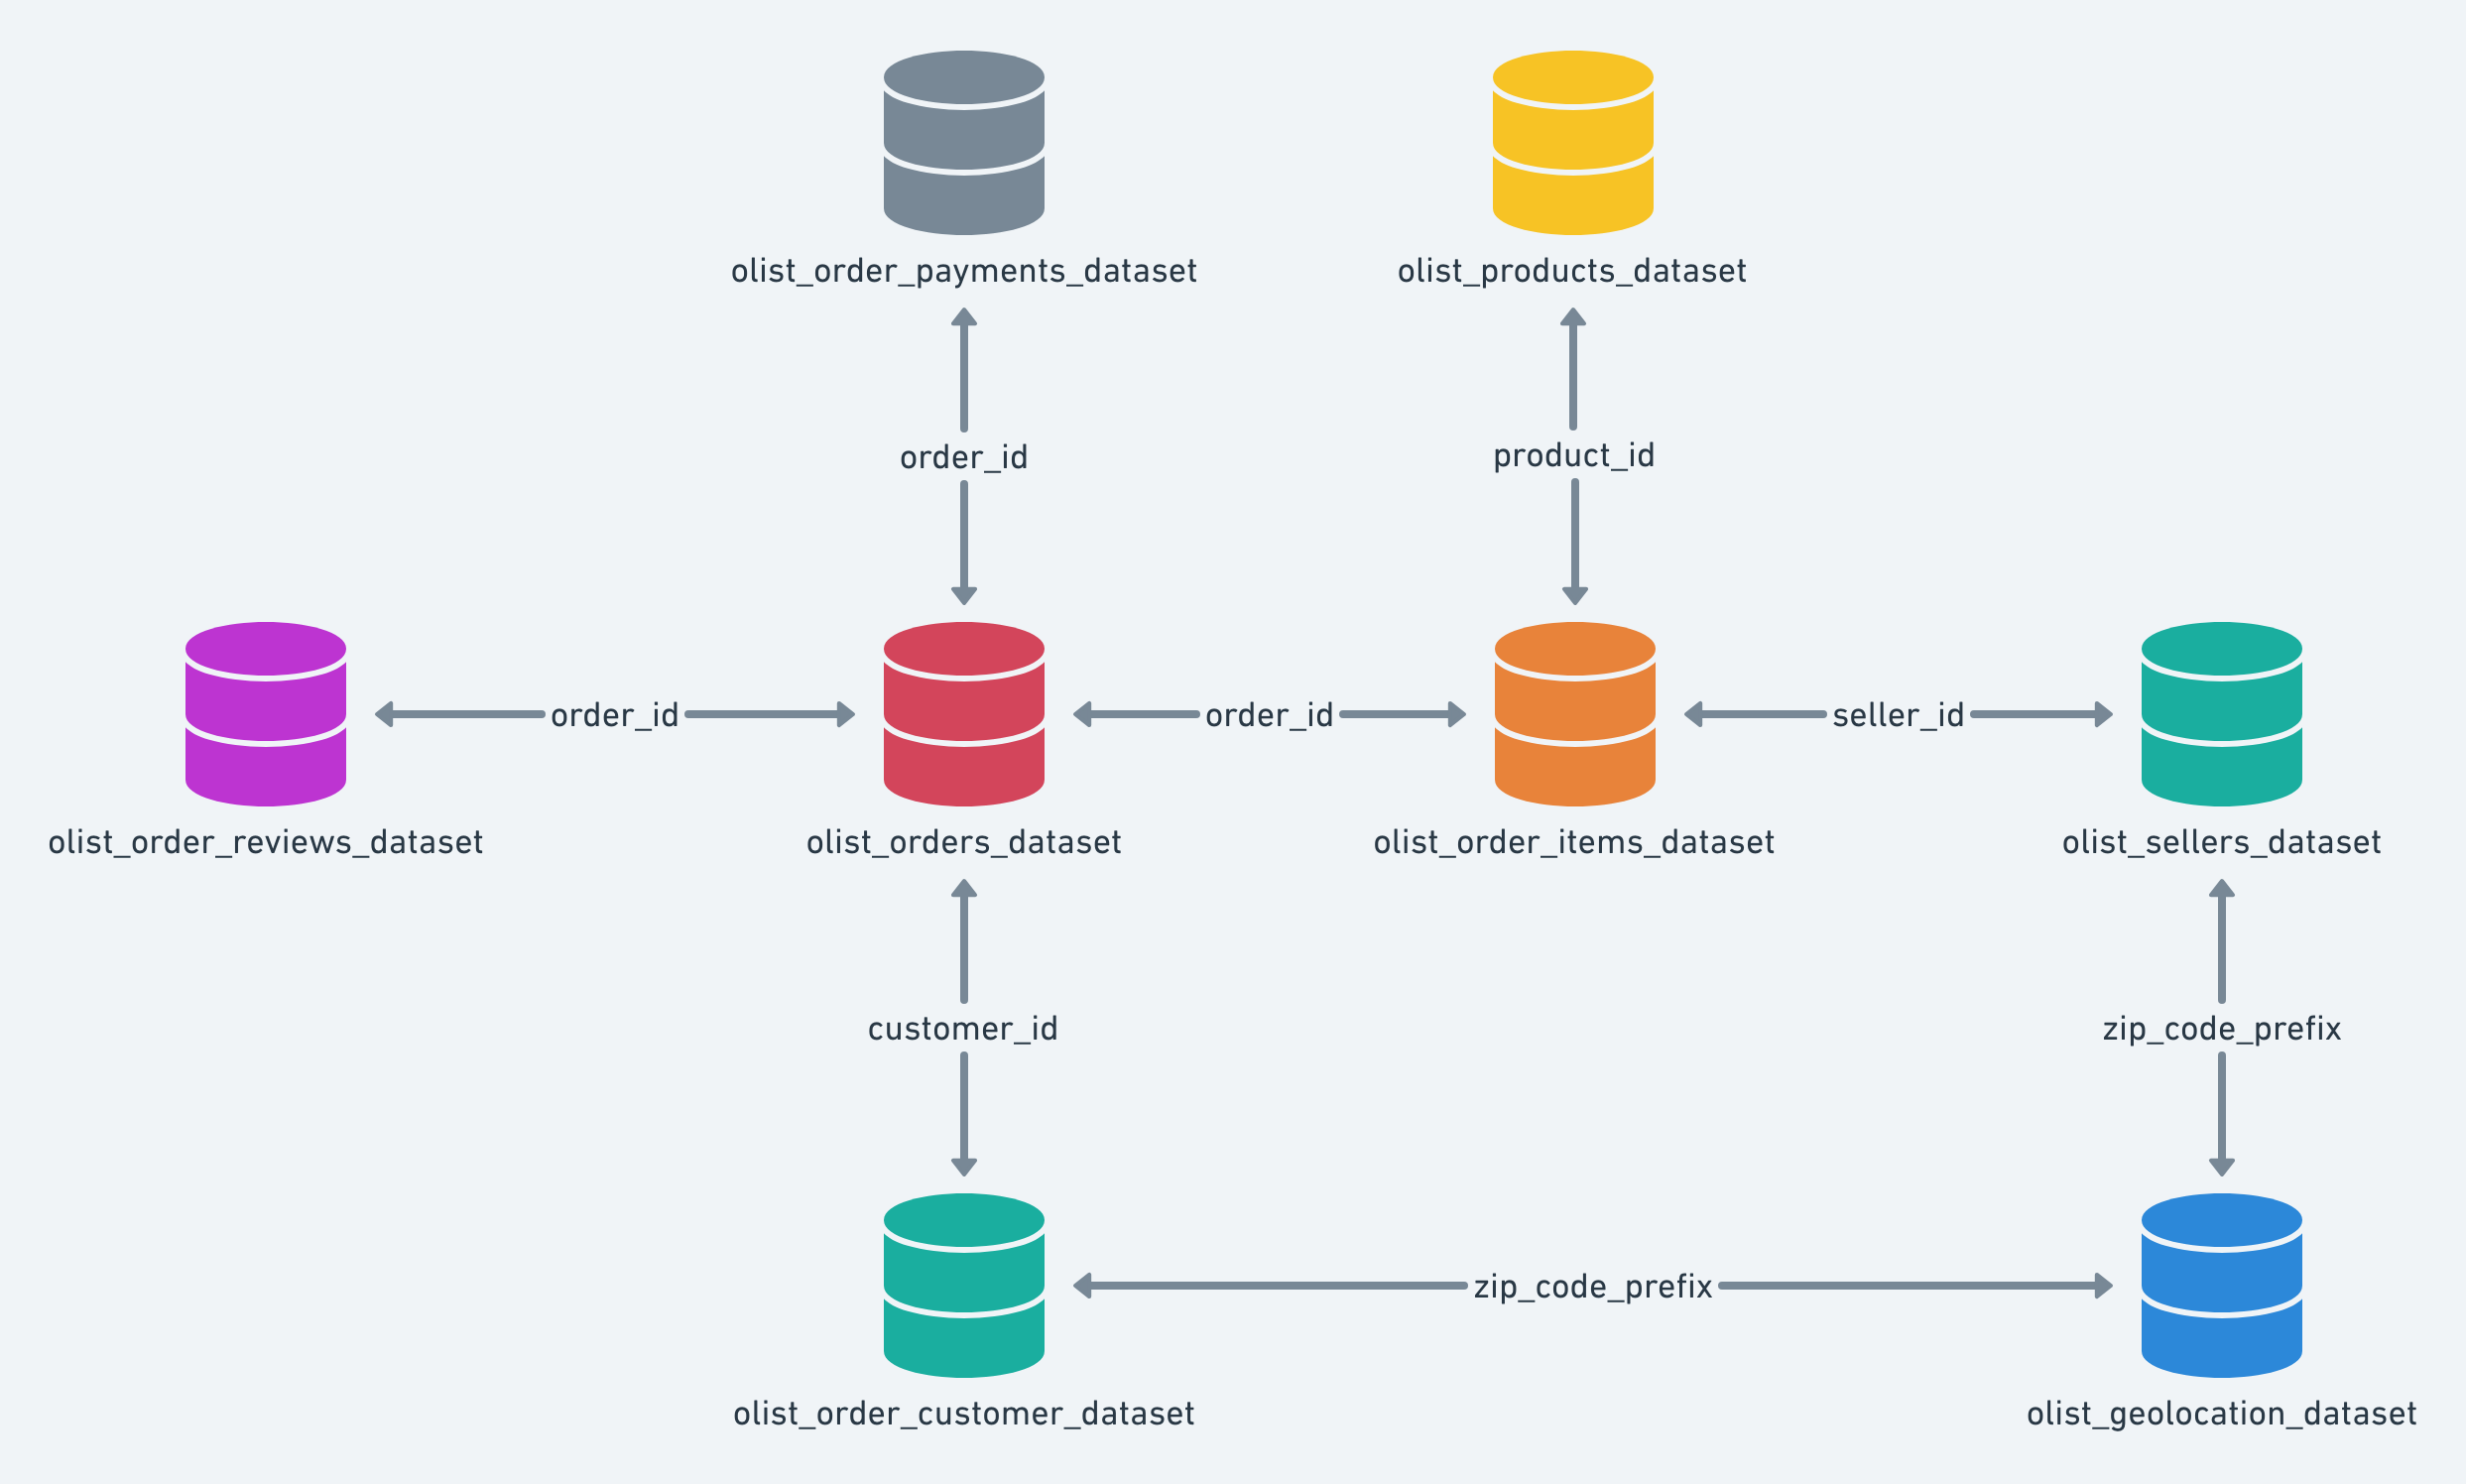

In [9]:
from IPython.display import Image
Image('C:/Users/misso/Desktop/Formation_DS_23_24_MERAH/2-Projet/5- Projet 5/2-Ressources/image_olist.PNG')


In [10]:
# Fusion des dataframes
df = pd.merge(orders_dataset, order_reviews_dataset, on='order_id')
df = pd.merge(df, order_payments_dataset, on='order_id')
df = pd.merge(df, order_items_dataset, on='order_id')
df = pd.merge(df, customers_dataset, on='customer_id')
df = pd.merge(df, products_dataset, on='product_id')
df = pd.merge(df, sellers_dataset, on='seller_id')
df = pd.merge(df,product_category_name_translation, on='product_category_name')

In [11]:
df.to_csv("df_merge.csv")

In [12]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,b46f1e34512b0f4c74a72398b03ca788,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,dc90f19c2806f1abba9e72ad3c350073,5,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,30b0ea32347476f4b427daf62e09a5bb,9d9cfbce48737214f23bf294daf3c6f7,delivered,2017-08-12 19:20:39,2017-08-12 19:30:17,2017-08-14 18:26:28,2017-08-17 18:28:10,2017-09-05 00:00:00,fdbbec4b750e768ac12c054acd906d1d,5,...,232.0,1.0,7600.0,55.0,15.0,55.0,89701,concordia,SC,la_cuisine
115605,1ce0acf125f1bcd636276dd213363196,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28 00:00:00,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,...,429.0,1.0,2700.0,85.0,7.0,40.0,89701,concordia,SC,la_cuisine
115606,1ce0acf125f1bcd636276dd213363196,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28 00:00:00,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,...,429.0,1.0,2700.0,85.0,7.0,40.0,89701,concordia,SC,la_cuisine
115607,c72888e51a36defb7b5d49201fcbccf7,c3cd86c3cbac654f8558a8286ba93c1c,delivered,2017-07-11 10:45:57,2017-07-11 10:55:14,2017-07-11 19:14:48,2017-07-19 17:27:43,2017-08-04 00:00:00,80d6f91212fb5216bfc90feddee75581,5,...,532.0,1.0,3600.0,30.0,30.0,30.0,13720,scao jose do rio pardo,SP,la_cuisine


In [13]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english'],
      dtype='object')

# **Partie 2 : Nettoyage des données**

# 2.1 Pourcentage des données manquantes

In [14]:
#Pourcentage des données manquantes
def Taux_Data_Manquantes (data) :
    return print('Taux des données manquantes est : ',round(data.isna().mean().mean()*100,2),'%')

In [15]:
#Pourcentage des données manquantes
Taux_Data_Manquantes (df) 
    

Taux des données manquantes est :  3.72 %


# 2.2 Données dupliquées

In [16]:
# Nombre de données dupliquées 
def Nb_Data_Dupliq(data) :
    return print("Nombre de données dupliquées :",data.duplicated().sum())

In [17]:
Nb_Data_Dupliq(df)

Nombre de données dupliquées : 0


In [18]:
#Nombre de Colonnes dupliquées
def Nb_Colonnes_Meme_Nom (data) :
    return ("Nombre de Colonnes dupliquées :",data.columns.duplicated().sum())

In [19]:
Nb_Colonnes_Meme_Nom(df)

('Nombre de Colonnes dupliquées :', 0)

# 2.3 Nombre de colonnes & lignes vides

In [20]:
#Nombre de colonnes vides
def Nb_Colonnes_Vides(data) :
    print("Nombre de colonnes vides :",data.isna().all(axis=0).sum())

In [21]:
Nb_Colonnes_Vides(df)

Nombre de colonnes vides : 0


In [22]:
# Nombre de lignes entierement vide
def Nb_Lignes_Vides (data) :
    return data.isna().all(axis=1).sum()

In [23]:
Nb_Lignes_Vides(df)

0

# 2.4 Suppression des colonnes ayant plus de 40% valeur manquantes

In [24]:
def Taux_colonne_NaN(data, taux):
    NaN_Taux = (data.isna().mean().sort_values(ascending=False)*100).reset_index()
    NaN_Taux.columns = ['Variable','Taux_de_NaN']
    NaNs_rate = NaN_Taux[NaN_Taux.Taux_de_NaN >= taux]
    return NaNs_rate

In [25]:
Taux_NaN_Col = Taux_colonne_NaN(df,40)
Taux_NaN_Col

,Variable,Taux_de_NaN
0,review_comment_title,88.062348
1,review_comment_message,57.697065


In [26]:
list(Taux_NaN_Col["Variable"])

['review_comment_title', 'review_comment_message']

In [27]:
# Suppression des colonnes ayant un taux de données manquantes trop élevée (40% de données manquantes)
df = df.drop(columns= list(Taux_NaN_Col["Variable"]))

In [28]:
df.shape

(115609, 38)

In [29]:
#Pourcentage des données manquantes
Taux_Data_Manquantes (df) 

Taux des données manquantes est :  0.08 %


 # 2.5 Imputation par KNN

In [30]:
cat_data =[]
num_data=[]

for i,n in enumerate (df.dtypes):
  if n==object :
     cat_data.append(df.iloc[:,i])
  else :
     num_data.append(df.iloc[:,i])

In [31]:
# Liste des variables qualitatives
cat_data=pd.DataFrame(cat_data).T
#Liste des variables quantitatives
num_data=pd.DataFrame(num_data).T

Text(0.5, 1.0, 'Nombre de données quantitatives sur chaque colonne')

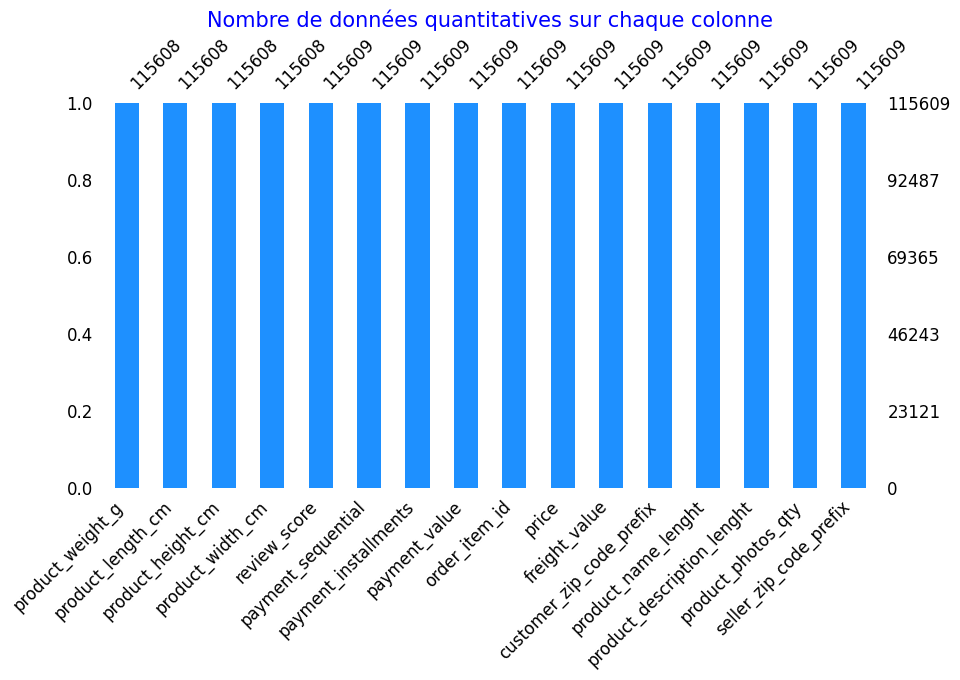

In [32]:
missingno.bar(num_data[num_data.columns], color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données quantitatives sur chaque colonne',color='blue',fontsize=15)

<Axes: >

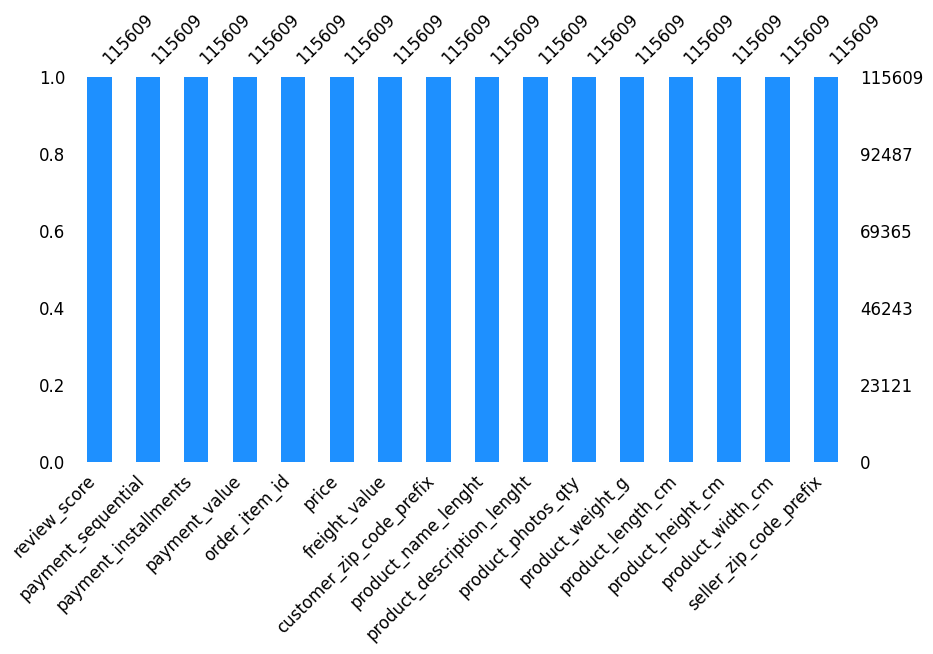

In [33]:
# Imputation
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df[num_data.columns]=imputer.fit_transform(df[num_data.columns])
missingno.bar(df[num_data.columns], color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [34]:
df.shape

(115609, 38)

In [35]:
def Graph_Pie_NaN(data):

    Nb_lignes = data.shape[0] 
    Nb_colonnes = data.shape[1]

    # Nombre de données non manquante
    Nb_data = data.count().sum()

    # Nombre de données totale de ce jeu de données (colonnes*lignes)
    Nb_totale = (Nb_colonnes*Nb_lignes)

    #taux remplissage jeu de données
    rate_data = (Nb_data/Nb_totale)
    print("Le jeux de données est rempli à {:.2%}".format(rate_data))
    print("et il a {:.2%} de données manquantes".format(1-rate_data))
    print(" ")
    print(" ")

    # Pie Plot
    rates = [rate_data, 1 - rate_data]
    labels = ["Données", "NaN"]

    explode =(0,0.1) 
    colors = ['gold', 'pink']
    # Plot
    plt.figure(figsize=(12,15))
    plt.pie(rates, explode=explode, labels=labels, colors=colors, autopct='%.2f%%', shadow=True, textprops={'fontsize': 20})

    ttl=plt.title("Taux de remplissage du jeu de données", fontsize = 20)
    ttl.set_position([0.5, 0.85])

    plt.axis('equal')
    #ax.legend(labels, loc = "upper right", fontsize = 18)
    plt.tight_layout() 

    plt.show()

Le jeux de données est rempli à 99.92%
et il a 0.08% de données manquantes
 
 


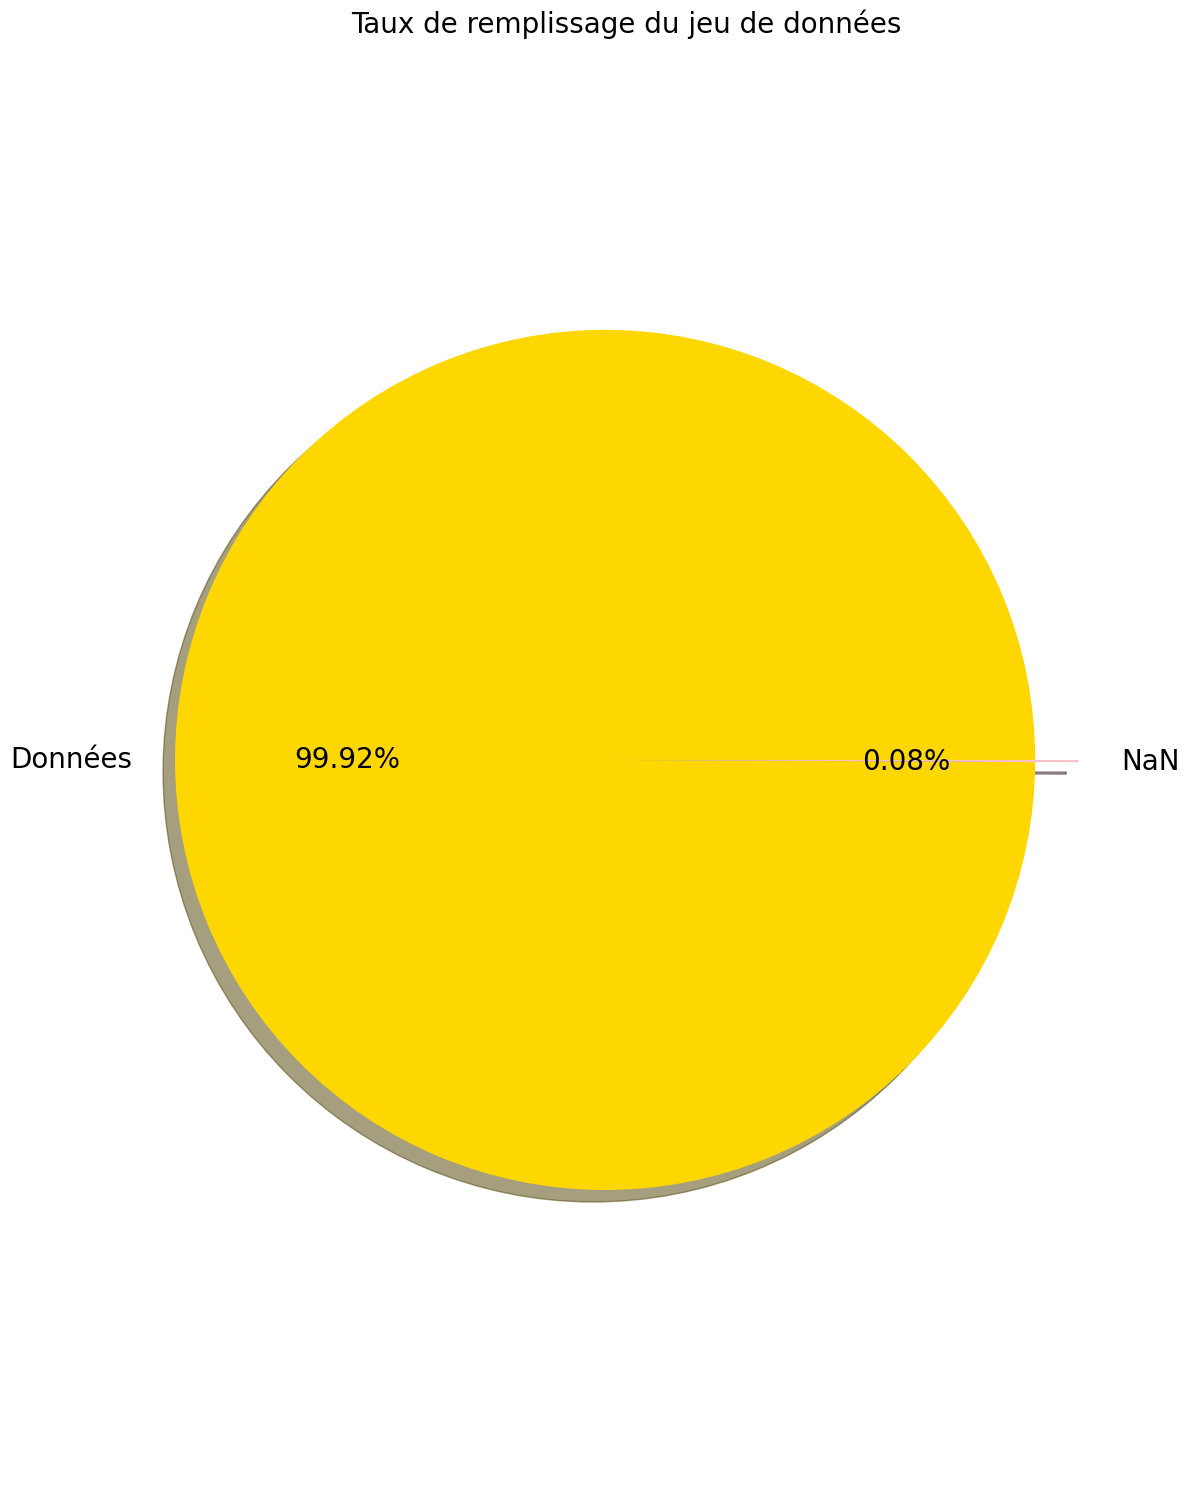

In [36]:
Graph_Pie_NaN(df)

# **Partie 3 : Suppression des colonnes inutiles**

# 3.1 Commandes livrées avec succès uniquement

In [37]:
# Compter le nombre d'occurrences de chaque valeur dans la colonne "order_status"
value_counts = df['order_status'].value_counts()

# Afficher les résultats
print(value_counts)

order_status
delivered      113210
shipped          1138
canceled          536
invoiced          358
processing        357
unavailable         7
approved            3
Name: count, dtype: int64


- delivered': Livrée avec succès
- 'shipped': Expédiée mais n'a pas encore été livrée.
- 'canceled': Annulée par le client ou par le système
- 'invoiced': Facturée et est en attente de paiement
- 'processing': En cours de traitement et n'a pas encore été expédiée
- 'unavailable': L'article commandé n'est plus disponible
- 'approved': La commande a été approuvée et est prête à être traitée

- **Seul "delivered" nous intéresse ici:**

In [38]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df = df[df['order_status'] == 'delivered']
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 115609
Nombre de lignes après la suppression : 113210


 - **On supprime maintenant la colonne "order_status" qui nous sert plus a rien**

In [39]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(["order_status"], axis=1)
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 38
Nombre de colonnes après la suppression : 37


# 3.2 Suppression colonne "product_category_name"

- **"product_category_name" peut être remplacé par "product_category_name_english"**

In [40]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(["product_category_name"], axis=1)
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 37
Nombre de colonnes après la suppression : 36


# 3.3 Suppression colonne "customer_id" 

 - **La colonne "customer_id" est moins intéréssante que la colonne "customer_unique_id"**

In [41]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(["customer_id"], axis=1)
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 36
Nombre de colonnes après la suppression : 35


# 3.4 Suppression colonne "payment_sequential"

 - **La colonne "payment_sequential" désigne l'ordre séquentiel des paiements -> Pas très intéréssant**

In [42]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(["payment_sequential"], axis=1)
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 35
Nombre de colonnes après la suppression : 34


# 3.5 Suppression lignes dupliqués

In [43]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df = df.drop_duplicates()
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 113210
Nombre de lignes après la suppression : 112566


In [44]:
data_olist=df.copy()
df_olist=df.copy()

# **Partie 4 : Requete SQL**

# 4.1 Requete 1 SQL

- **En excluant les commandes annulées, quelles sont les commandes
  récentes de moins de 3 mois que les clients ont reçues avec au moins 3
  jours de retard ?**

In [45]:
orders_dataset_Requete1=orders_dataset.copy()

In [46]:
orders_dataset_Requete1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [47]:
orders_dataset_Requete1['jul1'] = pd.DatetimeIndex(orders_dataset_Requete1['order_estimated_delivery_date']).to_julian_date()

In [48]:
orders_dataset_Requete1['jul2'] = pd.DatetimeIndex(orders_dataset_Requete1['order_delivered_customer_date']).to_julian_date()

In [49]:
orders_dataset_Requete1['date_delivery_retard'] = orders_dataset_Requete1['jul2']-orders_dataset_Requete1['jul1']

In [50]:
orders_dataset_Requete1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,jul1,jul2,date_delivery_retard
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2458044.5,2.458037e+06,-7.107488
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2458343.5,2.458338e+06,-5.355729
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2458365.5,2.458348e+06,-17.245498
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2458102.5,2.458090e+06,-12.980069
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2458175.5,2.458166e+06,-9.238171
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2457840.5,2.457830e+06,-10.369433
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2458179.5,2.458178e+06,-1.265324
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2458023.5,2.458018e+06,-5.524803
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2458164.5,2.458144e+06,-20.018819


In [51]:
orders_dataset_Requete1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,jul1,jul2,date_delivery_retard
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2458044.5,2.458037e+06,-7.107488
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2458343.5,2.458338e+06,-5.355729
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2458365.5,2.458348e+06,-17.245498
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2458102.5,2.458090e+06,-12.980069
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2458175.5,2.458166e+06,-9.238171
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2457840.5,2.457830e+06,-10.369433
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2458179.5,2.458178e+06,-1.265324
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2458023.5,2.458018e+06,-5.524803
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2458164.5,2.458144e+06,-20.018819


In [52]:
orders_dataset_Requete1['order_purchase_timestamp'] = pd.to_datetime(orders_dataset_Requete1['order_purchase_timestamp'])
# Define "now" as the latest timestamp in the data plus one day
Date_refR1= orders_dataset_Requete1['order_purchase_timestamp'].max() 

In [53]:
Date_refR1.strftime('%Y-%m-%d')


'2018-10-17'

In [54]:
Date_refR1=Date_refR1.strftime('%Y-%m-%d')


In [55]:
Date_refR1=pd.to_datetime(Date_refR1)
Date_refR1

Timestamp('2018-10-17 00:00:00')

In [56]:
orders_dataset_Requete1["order_recency_daysR1"]=Date_refR1+ relativedelta(months=-3) 

In [57]:
orders_dataset_Requete1['order_purchase_timestamp'] = pd.to_datetime(orders_dataset_Requete1['order_purchase_timestamp'])
# Define "now" as the latest timestamp in the data plus one day
Date_refR1= orders_dataset_Requete1['order_purchase_timestamp'].max() 

In [58]:
Late_delivere_3Days_receeny_90DaysR1=orders_dataset_Requete1[orders_dataset_Requete1["order_recency_daysR1"] <orders_dataset_Requete1['order_purchase_timestamp']]
Late_delivere_3Days_receeny_90DaysR1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,jul1,jul2,date_delivery_retard,order_recency_daysR1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2458343.5,2.458338e+06,-5.355729,2018-07-17
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2458365.5,2.458348e+06,-17.245498,2018-07-17
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,2458338.5,2.458330e+06,-8.338600,2018-07-17
24,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17 00:00:00,2458347.5,2.458344e+06,-3.233021,2018-07-17
34,b276e4f8c0fb86bd82fce576f21713e0,cf8ffeddf027932e51e4eae73b384059,delivered,2018-07-29 23:34:51,2018-07-29 23:45:15,2018-07-30 14:43:00,2018-07-31 22:48:50,2018-08-06 00:00:00,2458336.5,2.458331e+06,-5.049421,2018-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...
99394,079c9f53e6c3253320db701a645b0b9a,e5e0698e95094be297436cbd55c2dcad,delivered,2018-08-09 20:33:45,2018-08-09 20:50:17,2018-08-13 14:20:00,2018-08-16 17:51:09,2018-08-17 00:00:00,2458347.5,2.458347e+06,-0.256146,2018-07-17
99395,5597332b7eded552f104108f22b023e4,aaa423fb52f4106f477683490cbd5845,delivered,2018-08-15 13:03:37,2018-08-15 13:15:22,2018-08-15 14:37:00,2018-08-17 16:06:37,2018-08-21 00:00:00,2458351.5,2.458348e+06,-3.328738,2018-07-17
99396,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16 00:00:00,2458346.5,2.458352e+06,5.002384,2018-07-17
99407,c2af225ac9a68a3c24500aa6fab006aa,f93c9e539a9705a57902c625b611e90c,delivered,2018-08-20 10:04:30,2018-08-20 14:53:46,2018-08-22 13:16:00,2018-08-27 21:44:45,2018-08-28 00:00:00,2458358.5,2.458358e+06,-0.093924,2018-07-17


In [59]:
retard_3jR1=Late_delivere_3Days_receeny_90DaysR1[Late_delivere_3Days_receeny_90DaysR1['date_delivery_retard'] >3]

In [60]:
retard_3jR1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,jul1,jul2,date_delivery_retard,order_recency_daysR1
561,cfa4fa27b417971e86d8127cb688712f,7093250e1741ebbed41f0cc552025fd6,delivered,2018-08-16 09:44:23,2018-08-17 03:10:22,2018-08-17 18:55:00,2018-08-29 01:41:41,2018-08-22 00:00:00,2458352.5,2.458360e+06,7.070613,2018-07-17
711,234c056c50619f48da64f731c48242b4,44e460a655f7154ccd9faa4dbbbaf68a,delivered,2018-08-14 14:49:15,2018-08-15 03:15:15,2018-08-31 15:25:00,2018-09-01 18:14:42,2018-08-23 00:00:00,2458353.5,2.458363e+06,9.760208,2018-07-17
728,8ad3f1d0f96992e43566c4c82c9f6c58,948b29e24216a05fea13a18d8db45ea5,delivered,2018-07-17 21:25:29,2018-07-17 21:35:17,2018-07-18 13:08:00,2018-08-14 04:04:40,2018-08-03 00:00:00,2458333.5,2.458345e+06,11.169907,2018-07-17
1844,7f579e203c931f3e8410103359c6d523,d665be250d1c687c58fdea61a9b55a58,delivered,2018-08-02 18:09:27,2018-08-02 18:43:43,2018-08-10 14:15:00,2018-08-13 20:11:47,2018-08-09 00:00:00,2458339.5,2.458344e+06,4.841516,2018-07-17
1967,cb6e441ff2ef574ce08d3709426f88ec,4fb843d304c57182d4aa27bb39ca592b,delivered,2018-08-08 19:27:03,2018-08-08 19:44:59,2018-08-10 13:32:00,2018-08-18 01:11:58,2018-08-15 00:00:00,2458345.5,2.458349e+06,3.049977,2018-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...
98368,874a7690bc049bd4ce210d195bdfff7b,f6b2c83ea477af36f44a1e2df7320036,delivered,2018-08-02 12:06:47,2018-08-02 13:05:56,2018-08-10 14:42:00,2018-08-13 15:50:48,2018-08-08 00:00:00,2458338.5,2.458344e+06,5.660278,2018-07-17
98382,587e32dd528769d669d539531d32aeb5,0af8a25fb0b6f833724bb5818275807b,delivered,2018-08-10 11:46:09,2018-08-11 02:50:25,2018-08-14 10:09:00,2018-09-03 09:32:31,2018-08-28 00:00:00,2458358.5,2.458365e+06,6.397581,2018-07-17
98564,3adb141ba4bd69dd7fe8d3fb733c6b74,c0539d5c87fc7c97a8418adffe4b45f0,delivered,2018-08-14 23:29:21,2018-08-16 03:05:11,2018-08-16 13:28:00,2018-08-28 18:02:52,2018-08-24 00:00:00,2458354.5,2.458359e+06,4.751991,2018-07-17
99279,4cf09d9e5ebbe0f91ddd7bf9aae891cd,07b6b4fe5fefb948fc76b6d2bdba77d8,delivered,2018-07-19 08:37:26,2018-07-21 03:25:17,2018-07-23 15:31:00,2018-08-21 01:12:45,2018-08-10 00:00:00,2458340.5,2.458352e+06,11.050521,2018-07-17


# 4.2 Requete 2 SQL

- **Qui sont les vendeurs ayant généré un chiffre d'affaires de plus de 100000 Real sur des commandes livrés via Olist ?**

In [61]:
df_requete2 = pd.merge(orders_dataset,order_items_dataset, on='order_id')

In [62]:
df_requete2.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value'],
      dtype='object')

In [63]:
df_requete2 = df_requete2[df_requete2['order_status'] == 'delivered']

In [64]:
df_requete2=df_requete2 [['order_id','seller_id','price']]

In [65]:
df_requete2.shape

(110197, 3)

In [66]:
Nb_Data_Dupliq(df_requete2)

Nombre de données dupliquées : 11120


In [67]:
#suppression des doublons
df_requete2.drop_duplicates(inplace=True)
df_requete2.shape

(99077, 3)

In [68]:
Nb_Data_Dupliq(df_requete2)

Nombre de données dupliquées : 0


In [69]:
df_clients_requete2=df_requete2.groupby('seller_id').agg(
    {
        'price':'sum'
      }
)   


In [70]:
result_requete2=df_clients_requete2[df_clients_requete2["price"] >100000]
result_requete2

,price
seller_id,
1025f0e2d44d7041d6cf58b6550e0bfa,112211.23
46dc3b2cc0980fb8ec44634e21d2718e,120671.54
4869f7a5dfa277a7dca6462dcf3b52b2,224921.54
4a3ca9315b744ce9f8e9374361493884,183828.07
53243585a1d6dc2643021fd1853d8905,203364.00
5dceca129747e92ff8ef7a997dc4f8ca,109116.07
620c87c171fb2a6dd6e8bb4dec959fc6,107693.40
6560211a19b47992c3666cc44a7e94c0,116660.83
7a67c85e85bb2ce8582c35f2203ad736,139098.77


In [71]:
print("Nmobre des vendeurs ayant généré un chiffre d'affaires de plus de 100000 Real sur des commandes livrés via Olist :")
len(result_requete2)

Nmobre des vendeurs ayant généré un chiffre d'affaires de plus de 100000 Real sur des commandes livrés via Olist :


15

In [72]:
result_requete2.sort_values("price", ascending=False, inplace=True)

In [73]:
result_requete2=result_requete2.reset_index()

In [74]:
result_requete2

,seller_id,price
0,4869f7a5dfa277a7dca6462dcf3b52b2,224921.54
1,53243585a1d6dc2643021fd1853d8905,203364.00
2,fa1c13f2614d7b5c4749cbc52fecda94,190917.14
3,4a3ca9315b744ce9f8e9374361493884,183828.07
4,7e93a43ef30c4f03f38b393420bc753a,165822.49
5,da8622b14eb17ae2831f4ac5b9dab84a,141875.38
6,7c67e1448b00f6e969d365cea6b010ab,140998.62
7,7a67c85e85bb2ce8582c35f2203ad736,139098.77
8,46dc3b2cc0980fb8ec44634e21d2718e,120671.54
9,6560211a19b47992c3666cc44a7e94c0,116660.83


# 4.3 Requete 3 SQL

-**Qui sont les nouveaux vendeurs (moins de 3 mois d'ancienneté) qui
 sont déjà très engagés avec la plateforme (ont déjà vendu plus de 30
 produits) ?**

In [75]:
#Merge
df_requete3 = pd.merge(orders_dataset,order_items_dataset, on='order_id')

In [76]:
df_requete3 = df_requete3[df_requete3['order_status'] == 'delivered']

In [77]:
df_requete3=df_requete3[['order_id','seller_id','order_purchase_timestamp']]

In [78]:
Nb_Data_Dupliq(df_requete3)

Nombre de données dupliquées : 12378


In [79]:
#suppression des doublons
df_requete3.drop_duplicates(inplace=True)
df_requete3.shape

(97819, 3)

In [80]:
df_requete3.sort_values("order_purchase_timestamp", ascending=False, inplace=True)
df_requete3

,order_id,seller_id,order_purchase_timestamp
99673,35a972d7f8436f405b56e36add1a7140,9f505651f4a6abe901a56cdc21508025,2018-08-29 15:00:37
78871,03ef5dedbe7492bdae72eec50764c43f,7d7866a99a8656a42c7ff6352a433410,2018-08-29 14:52:00
35685,168626408cb32af0ffaf76711caae1dc,2a84855fd20af891be03bc5924d2b453,2018-08-29 14:18:28
34060,0b223d92c27432930dfe407c6aea3041,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-29 14:18:23
112574,52018484704db3661b98ce838612b507,5f2684dab12e59f83bef73ae57724e45,2018-08-29 12:25:59
...,...,...,...
100101,d207cc272675637bfed0062edffd0818,cca3071e3e9bb7d12640c9fbe2301306,2016-10-03 22:06:03
110955,a41c8759fbe7aab36ea07e038b2d4465,45d33f715e24d15a6ccf5c17b3a23e3c,2016-10-03 21:13:36
32183,be5bc2f0da14d8071e2d45451ad119d9,f09b760d23495ac9a7e00d29b769007c,2016-10-03 16:56:50
105636,3b697a20d9e427646d92567910af6d57,522620dcb18a6b31cd7bdf73665113a9,2016-10-03 09:44:50


In [81]:
# Define "now" as the latest timestamp in the data plus one day
Date_refR3max= pd.to_datetime(orders_dataset_Requete1['order_purchase_timestamp']).max() 

In [82]:
Date_refR3max

Timestamp('2018-10-17 17:30:18')

In [83]:
Date_refR3max=Date_refR3max.strftime('%Y-%m-%d')

In [84]:
Date_refR3max=pd.to_datetime(Date_refR3max)
Date_refR3max

Timestamp('2018-10-17 00:00:00')

In [85]:
df_requete3["order_recency_daysR3"]=Date_refR3max+ relativedelta(months=-3) 

In [86]:
df_requete3

,order_id,seller_id,order_purchase_timestamp,order_recency_daysR3
99673,35a972d7f8436f405b56e36add1a7140,9f505651f4a6abe901a56cdc21508025,2018-08-29 15:00:37,2018-07-17
78871,03ef5dedbe7492bdae72eec50764c43f,7d7866a99a8656a42c7ff6352a433410,2018-08-29 14:52:00,2018-07-17
35685,168626408cb32af0ffaf76711caae1dc,2a84855fd20af891be03bc5924d2b453,2018-08-29 14:18:28,2018-07-17
34060,0b223d92c27432930dfe407c6aea3041,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-29 14:18:23,2018-07-17
112574,52018484704db3661b98ce838612b507,5f2684dab12e59f83bef73ae57724e45,2018-08-29 12:25:59,2018-07-17
...,...,...,...,...
100101,d207cc272675637bfed0062edffd0818,cca3071e3e9bb7d12640c9fbe2301306,2016-10-03 22:06:03,2018-07-17
110955,a41c8759fbe7aab36ea07e038b2d4465,45d33f715e24d15a6ccf5c17b3a23e3c,2016-10-03 21:13:36,2018-07-17
32183,be5bc2f0da14d8071e2d45451ad119d9,f09b760d23495ac9a7e00d29b769007c,2016-10-03 16:56:50,2018-07-17
105636,3b697a20d9e427646d92567910af6d57,522620dcb18a6b31cd7bdf73665113a9,2016-10-03 09:44:50,2018-07-17


In [87]:
Late_delivere_3Days_receeny_R3=df_requete3.groupby('seller_id').agg(
    {
    
         "order_id":"count",
         "order_purchase_timestamp":"min",
         "order_recency_daysR3":lambda x: x.value_counts().idxmax(),
    }
) 

In [88]:
Late_delivere_3Days_receeny_R3

,order_id,order_purchase_timestamp,order_recency_daysR3
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,3,2017-09-26 22:17:05,2018-07-17
001cca7ae9ae17fb1caed9dfb1094831,195,2017-02-04 19:06:04,2018-07-17
002100f778ceb8431b7a1020ff7ab48f,50,2017-09-14 01:00:31,2018-07-17
003554e2dce176b5555353e4f3555ac8,1,2017-12-15 06:52:25,2018-07-17
004c9cd9d87a3c30c522c48c4fc07416,156,2017-01-27 10:34:34,2018-07-17
...,...,...,...
ffc470761de7d0232558ba5e786e57b7,27,2018-02-20 18:47:21,2018-07-17
ffdd9f82b9a447f6f8d4b91554cc7dd3,18,2017-03-05 16:21:27,2018-07-17
ffeee66ac5d5a62fe688b9d26f83f534,14,2017-09-30 15:56:56,2018-07-17


In [89]:
Late_delivere_3Days_receeny_R3=Late_delivere_3Days_receeny_R3[Late_delivere_3Days_receeny_R3["order_recency_daysR3"] < Late_delivere_3Days_receeny_R3['order_purchase_timestamp'] ]
Late_delivere_3Days_receeny_R3

,order_id,order_purchase_timestamp,order_recency_daysR3
seller_id,,,
01266d4c46afa519678d16a8b683d325,3,2018-08-02 16:07:38,2018-07-17
02b72cdeb9cfcc429f1af6f4e3f3b737,4,2018-07-25 21:20:47,2018-07-17
044668ccd5316b12a7cf0d54a156e3e9,3,2018-08-08 17:54:25,2018-07-17
04843805947f0fc584fc1969b6e50fe7,1,2018-08-05 14:55:14,2018-07-17
04ee0ec01589969663ba5967c0e0bdc0,1,2018-08-21 11:29:05,2018-07-17
...,...,...,...
fd435faa3c0422b60440ea3480d0e77c,1,2018-08-20 07:36:53,2018-07-17
fdf736c18c589ed030e058312203e1b2,1,2018-08-02 12:07:30,2018-07-17
fe1b067411b8c5066e962aa146ccee03,8,2018-07-24 13:41:59,2018-07-17


In [90]:
Late_delivere_3Days_receeny_R3.reset_index()

,seller_id,order_id,order_purchase_timestamp,order_recency_daysR3
0,01266d4c46afa519678d16a8b683d325,3,2018-08-02 16:07:38,2018-07-17
1,02b72cdeb9cfcc429f1af6f4e3f3b737,4,2018-07-25 21:20:47,2018-07-17
2,044668ccd5316b12a7cf0d54a156e3e9,3,2018-08-08 17:54:25,2018-07-17
3,04843805947f0fc584fc1969b6e50fe7,1,2018-08-05 14:55:14,2018-07-17
4,04ee0ec01589969663ba5967c0e0bdc0,1,2018-08-21 11:29:05,2018-07-17
...,...,...,...,...
252,fd435faa3c0422b60440ea3480d0e77c,1,2018-08-20 07:36:53,2018-07-17
253,fdf736c18c589ed030e058312203e1b2,1,2018-08-02 12:07:30,2018-07-17
254,fe1b067411b8c5066e962aa146ccee03,8,2018-07-24 13:41:59,2018-07-17
255,fe9d9cf8631285d5982c6e2cf27fb114,1,2018-07-19 21:58:43,2018-07-17


In [91]:
Late_delivere_3Days_receeny_R3=Late_delivere_3Days_receeny_R3[Late_delivere_3Days_receeny_R3["order_id"] >30]
Late_delivere_3Days_receeny_R3

,order_id,order_purchase_timestamp,order_recency_daysR3
seller_id,,,
240b9776d844d37535668549a396af32,35,2018-07-17 13:48:59,2018-07-17
81f89e42267213cb94da7ddc301651da,46,2018-08-08 12:45:12,2018-07-17
d13e50eaa47b4cbe9eb81465865d8cfc,66,2018-08-04 09:09:37,2018-07-17


# 4.4 Requete 4 SQL

- **Quels sont les 5 codes postaux, enregistrant plus de 30 commandes,avec le pire review score moyen sur les 12 derniers mois ?**

In [92]:
order_reviews_Requete4=order_reviews_dataset.copy()

In [93]:
order_reviews_Requete4["Nb_review_score"]=order_reviews_Requete4["review_score"]

In [94]:
order_reviews_Requete4["Mean_review_score"]=order_reviews_Requete4["review_score"]

In [95]:
order_reviews_Requete4

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Nb_review_score,Mean_review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,4,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,5,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,5,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,5,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5,5
...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,5,5
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,5,5
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,5,5
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,4,4


In [96]:
#merge
df_requete4 = pd.merge(orders_dataset,customers_dataset, on='customer_id')
df_requete4= pd.merge(df_requete4,order_reviews_Requete4, on='order_id')

In [97]:
df_requete4.shape

(99224, 20)

In [98]:
df_requete4=df_requete4[['order_id','customer_zip_code_prefix','review_score','order_purchase_timestamp','Nb_review_score', 'Mean_review_score']]

In [99]:
#Nombre de données dupliquées 
Nb_Data_Dupliq(df_requete4)

Nombre de données dupliquées : 349


In [100]:
#suppression des doublons
df_requete4.drop_duplicates(inplace=True)
df_requete4.shape

(98875, 6)

In [101]:
# Calcul Date Ref
Date_refR4max= pd.to_datetime(df_requete4['order_purchase_timestamp']).max() 

In [102]:
Date_refR4max

Timestamp('2018-10-17 17:30:18')

In [103]:
Date_refR4max=Date_refR4max.strftime('%Y-%m-%d')

In [104]:
Date_refR4max=pd.to_datetime(Date_refR4max)
Date_refR4max

Timestamp('2018-10-17 00:00:00')

In [105]:
#L'etude sur les 12 derniers mois
df_requete4["order_recency_daysR4"]=Date_refR4max+ relativedelta(months=-12) 
df_requete4=df_requete4[df_requete4["order_recency_daysR4"] <df_requete4['order_purchase_timestamp'] ]
df_requete4

,order_id,customer_zip_code_prefix,review_score,order_purchase_timestamp,Nb_review_score,Mean_review_score,order_recency_daysR4
1,53cdb2fc8bc7dce0b6741e2150273451,47813,4,2018-07-24 20:41:37,4,4,2017-10-17
2,47770eb9100c2d0c44946d9cf07ec65d,75265,5,2018-08-08 08:38:49,5,5,2017-10-17
3,949d5b44dbf5de918fe9c16f97b45f8a,59296,5,2017-11-18 19:28:06,5,5,2017-10-17
4,ad21c59c0840e6cb83a9ceb5573f8159,9195,5,2018-02-13 21:18:39,5,5,2017-10-17
12,82566a660a982b15fb86e904c8d32918,35400,5,2018-06-07 10:06:19,5,5,2017-10-17
...,...,...,...,...,...,...,...
99214,b0f4af5c1b06e24fef510703bfe9f0a6,57042,5,2017-10-27 15:21:00,5,5,2017-10-17
99215,cfa78b997e329a5295b4ee6972c02979,83870,1,2017-12-20 09:52:41,1,1,2017-10-17
99220,63943bddc261676b46f01ca7ac2f7bd8,11722,4,2018-02-06 12:58:58,4,4,2017-10-17
99222,11c177c8e97725db2631073c19f07b62,28685,2,2018-01-08 21:28:27,2,2,2017-10-17


In [106]:
#Calcul le nombre de score et la moyenne de score 
Requete4_review_score=df_requete4.groupby('customer_zip_code_prefix').agg(
    {   
         "Nb_review_score":"count",
         "Mean_review_score":"mean",
    }
) 

In [107]:
#Selection de codes postaux de plus 30 commandes
Requete4_review_score.sort_values("Nb_review_score", ascending=False, inplace=True)
Requete4_review_score=Requete4_review_score[Requete4_review_score["Nb_review_score"] >30]
Requete4_review_score

,Nb_review_score,Mean_review_score
customer_zip_code_prefix,,
22790,98,3.744898
24230,92,3.956522
22793,90,3.233333
24220,89,3.617978
22775,74,3.500000
...,...,...
22270,31,4.096774
88220,31,4.258065
22231,31,4.161290


In [108]:
Requete4_review_score.sort_values("Mean_review_score", ascending=True, inplace=True)
Requete4_review_score

,Nb_review_score,Mean_review_score
customer_zip_code_prefix,,
22753,47,2.808511
22770,37,3.135135
22793,90,3.233333
21321,36,3.277778
13295,31,3.354839
...,...,...
9371,48,4.520833
35700,48,4.520833
12246,37,4.540541


In [109]:
#Top 5 de codes postaux
Requete4_review_score.head(5)

,Nb_review_score,Mean_review_score
customer_zip_code_prefix,,
22753,47,2.808511
22770,37,3.135135
22793,90,3.233333
21321,36,3.277778
13295,31,3.354839


# **Partie 5 : Préparation du jeu de données**

# 5.1 Localisation: Top 10 états avec le plus de clients

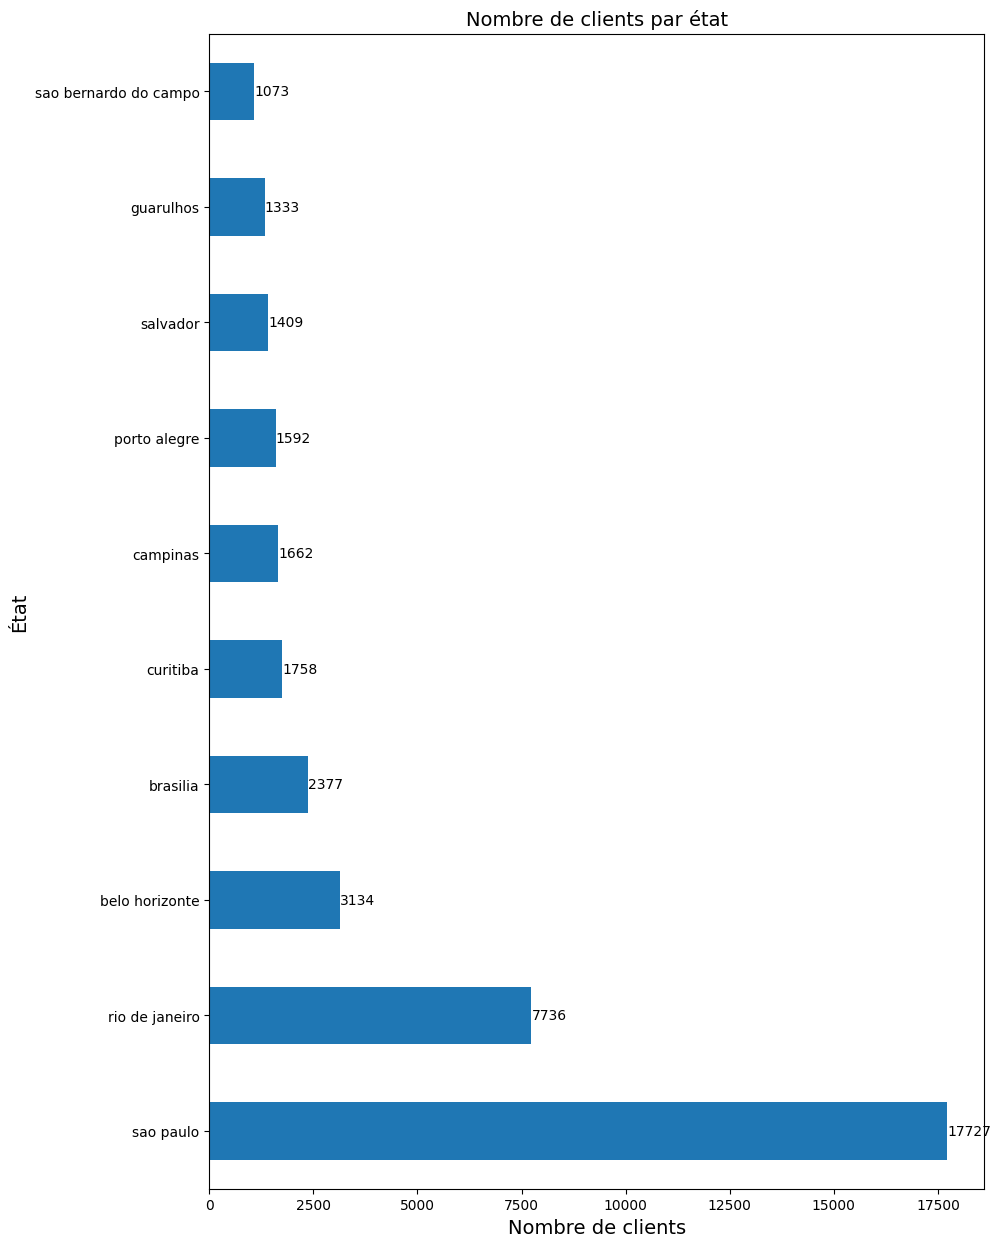

In [110]:
# Obtenir le décompte des catégories de produits et les trier par ordre décroissant
localisation = data_olist['customer_city'].value_counts().sort_values(ascending=False).head(10)

# Créer une figure avec une taille personnalisée
plt.figure(figsize=(10, 15))

# Créer le graphique à barres avec les axes inversés
ax = localisation.plot(kind='barh')

# Ajouter les annotations
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

# Ajouter les titres et labels
plt.title('Nombre de clients par état',fontsize=14)
plt.xlabel('Nombre de clients',fontsize=14)
plt.ylabel('État',fontsize=14)
plt.show()

In [111]:
localisation=pd.DataFrame(localisation)
localisation

,count
customer_city,
sao paulo,17727
rio de janeiro,7736
belo horizonte,3134
brasilia,2377
curitiba,1758
campinas,1662
porto alegre,1592
salvador,1409
guarulhos,1333


# 5.2 Délai de livraison par commande

In [112]:

data_olist['order_purchase_timestamp'] = pd.to_datetime( data_olist['order_purchase_timestamp'] )
data_olist['order_delivered_customer_date'] = pd.to_datetime( data_olist['order_delivered_customer_date'] )

data_olist['Delai_de_livraison'] = (data_olist['order_delivered_customer_date'] -  data_olist['order_purchase_timestamp']).dt.days

In [113]:

data_olist[['customer_unique_id','order_purchase_timestamp','order_delivered_customer_date','Delai_de_livraison',]]

,customer_unique_id,order_purchase_timestamp,order_delivered_customer_date,Delai_de_livraison
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0
3,3a51803cc0d012c3b5dc8b7528cb05f7,2017-08-15 18:29:31,2017-08-18 14:44:43,2.0
4,ef0996a1a279c26e7ecbd737be23d235,2017-08-02 18:24:47,2017-08-07 18:30:01,5.0
...,...,...,...,...
115604,6c861f46d09c560422f6ba6b33c017fe,2017-08-12 19:20:39,2017-08-17 18:28:10,4.0
115605,6968d41eb700f1ea39424e04b854bf7e,2017-07-31 18:10:29,2017-08-09 20:38:07,9.0
115606,6968d41eb700f1ea39424e04b854bf7e,2017-07-31 18:10:29,2017-08-09 20:38:07,9.0
115607,d8b80a0bd7560fab10e804f36d99fe33,2017-07-11 10:45:57,2017-07-19 17:27:43,8.0


# 5.3  Répartition des moyens de paiement les plus utilisés par les clients

<Axes: title={'center': 'Répartition des moyens de paiement les plus utilisés par les clients'}, ylabel='payment_type'>

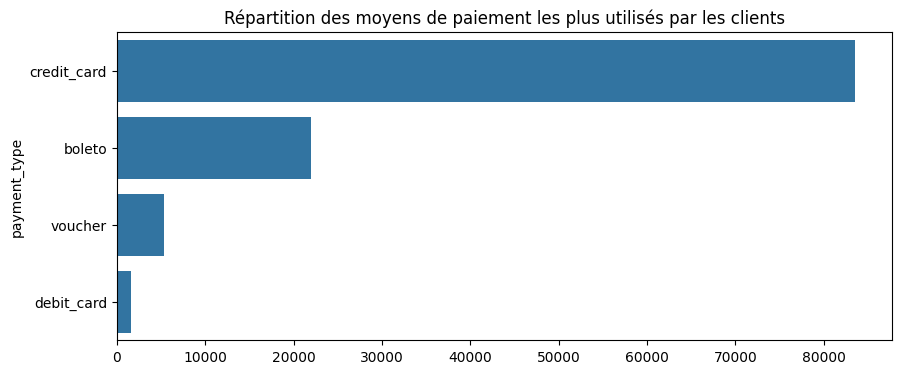

In [114]:
payment = data_olist.groupby(['payment_type']).count()[
    'order_id'].sort_values(ascending=False)
plt.figure(figsize=(10,4))
plt.title('Répartition des moyens de paiement les plus utilisés par les clients')
sns.barplot(x = payment.values,
           y = payment.index)

In [115]:
payment=pd.DataFrame(payment)
payment

,order_id
payment_type,
credit_card,83516
boleto,22029
voucher,5398
debit_card,1623


# 5.4 Distribution Top 10 des catégories des produits 

In [116]:
 # catégorie la plus achetée
categorie_produit_name = data_olist['product_category_name_english'].value_counts().sort_values(ascending=False).head(10)

In [117]:
categorie_produit=pd.DataFrame(categorie_produit_name )
categorie_produit

,count
product_category_name_english,
bed_bath_table,11588
health_beauty,9693
sports_leisure,8682
furniture_decor,8521
computers_accessories,7915
housewares,7105
watches_gifts,6005
telephony,4551
garden_tools,4426


<Figure size 1000x1500 with 0 Axes>

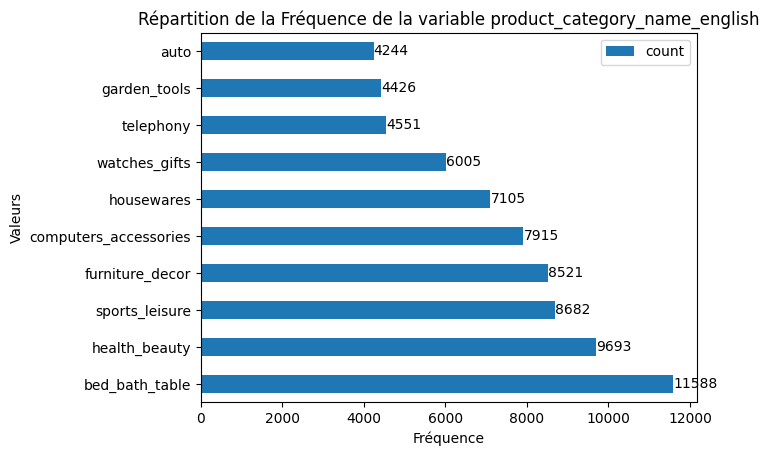

In [118]:
# Créer une figure avec une taille personnalisée
plt.figure(figsize=(10, 15))

# Créer le graphique à barres avec les axes inversés
ax = categorie_produit.plot(kind='barh')

# Ajouter les annotations
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

# Ajouter les titres et labels
plt.title('Répartition de la Fréquence de la variable ' + df['product_category_name_english'].name)
plt.xlabel('Fréquence')
plt.ylabel('Valeurs')
plt.show()

In [119]:
data_olist_cat=data_olist.copy()

In [120]:
data_olist_cat = data_olist_cat.groupby('customer_unique_id').agg(
    categorie_produit=("product_category_name_english",
                       lambda x: x.value_counts().idxmax()))

In [121]:
# catégorie la plus achetée
categorie_produit=("product_category_name_english",
                       lambda x: x.value_counts().idxmax())
# Define dictionnary containing a map between
# the names of different categories and the new categories
categories = list(data_olist_cat['categorie_produit'].unique())

fashion_word = ['fashion', 'clothes', 'underwear', 'clothing', 'baby']
fashion = [x for x in categories
           if any(word in x for word in fashion_word)]

home_furniture_Garden_word = ['house', 'office_furniture', 'upholstery',
                              'home', 'cuisine', 'cool_stuff', 'room',
                              'mattress', 'tool', 'kitchen', 'table',
                              'bed', 'air_conditioning',
                              'appliance', 'auto']
home_furniture_Garden = [x for x in categories
                         if any(word in x for word
                                in home_furniture_Garden_word)]

book_word = ['book']
book = [x for x in categories
        if any(word in x for word in book_word)]

accessories_decor_word = ['luggage', 'bags', 'supplies',
                          'flowers', 'gift', 'decor']
accessories_decor = [x for x in categories
                     if any(word in x for word
                            in accessories_decor_word)]

electronics_word = ['stationery', 'telephony', 'image',
                    'print', 'audio', 'photo', 'fixed_telephony',
                    'computer', 'electronic']
electronics = [x for x in categories
               if any(word in x for word in electronics_word)]

toys_games_word = ['game', 'consoles_games', 'toy']
toys_games = [x for x in categories
              if any(word in x for word in toys_games_word)]

health_beauty_word = ['hygiene', 'health', 'beauty',
                      'perfumery', 'sport']
health_beauty = [x for x in categories
                 if any(word in x for word in health_beauty_word)]

services_word = ['services', 'security']
services = [x for x in categories
            if any(word in x for word in services_word)]

music_arts_word = ['art', 'dvds', 'musical_instruments', 'music']
music_arts = [x for x in categories
              if any(word in x for word in music_arts_word)]

marketplace_word = ['market', 'place']
marketplace = [x for x in categories
               if any(word in x for word in marketplace_word)]

industry_word = ['agro_industry_and_commerce', 'industry',
                 'commerce', 'business']
industry = [x for x in categories
            if any(word in x for word in industry_word)]

food_drink_word = ['food_drink', 'pet', 'food', 'drink']
food_drink = [x for x in categories
              if any(word in x for word in food_drink_word)]

# dictionnaire
dict_category = {k: "Fashion" for k in fashion}
dict_category.update({k: "Home_FurnitureAndGarden"
                      for k in home_furniture_Garden})
dict_category.update({k: "Books" for k in book})
dict_category.update({k: "AccessoriesAndDecor" for k in accessories_decor})
dict_category.update({k: "Electronics" for k in electronics})
dict_category.update({k: "ToysAndGames" for k in toys_games})
dict_category.update({k: "HealthAndBeauty" for k in health_beauty})
dict_category.update({k: "Services" for k in services})
dict_category.update({k: "MusicAndArts" for k in music_arts})
dict_category.update({k: "MarketPlace" for k in marketplace})
dict_category.update({k: "Industry" for k in industry})
dict_category.update({k: "FoodAndDrink" for k in food_drink})
dict_category.update({'unknown': 'unknown'})

In [122]:
data_olist_cat['categorie_produit'].nunique()
data_olist_cat['categorie_produit'] = data_olist_cat['categorie_produit']\
    .map(dict_category)
df_categorie_produit = pd.DataFrame(data_olist_cat['categorie_produit'].value_counts())
df_categorie_produit

,count
categorie_produit,
Home_FurnitureAndGarden,30393
HealthAndBeauty,18596
Electronics,15641
AccessoriesAndDecor,14035
ToysAndGames,4639
Fashion,3189
FoodAndDrink,2515
MusicAndArts,919
Books,770


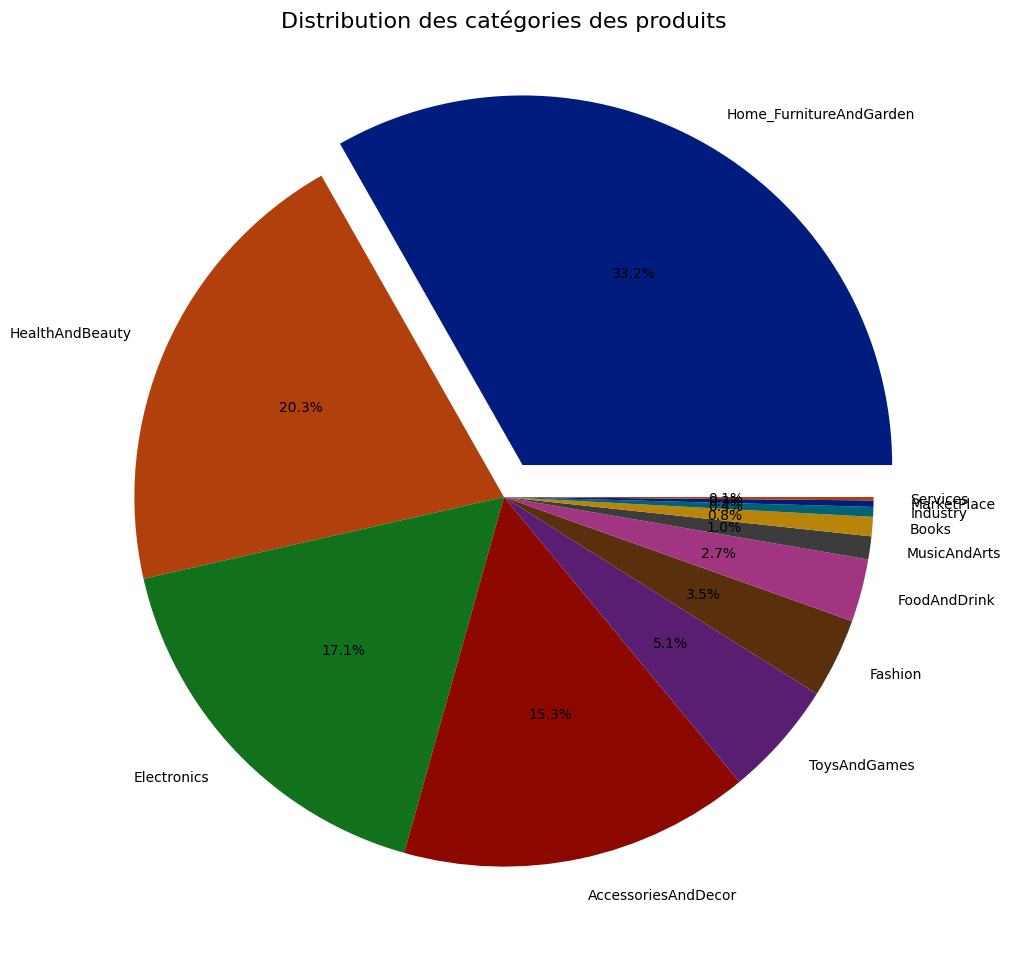

In [123]:
#Pieplot de représentation des catégories de produits
colors_niveau = sns.color_palette('dark')
plt.figure(figsize=(15, 12))
plt.title('Distribution des catégories des produits', size=16)
nb_par_var = df_categorie_produit
nb_par_var = data_olist_cat['categorie_produit'].value_counts()
#nb_par_var = data['product_new_category_name'].sort_values().value_counts()
#nb_par_var = nb_par_var.loc[sorted(nb_par_var.index)]
explode = [0.1]
for i in range(len(nb_par_var) - 1):
        explode.append(0)
wedges, texts, autotexts = plt.pie(
        nb_par_var, labels=nb_par_var.index, autopct='%1.1f%%',colors=colors_niveau  , explode=explode)

# 5.5 Période d'achat

In [124]:
# Convert order_purchase_timestamp to datetime
data_olist['order_purchase_timestamp'] = pd.to_datetime(data_olist['order_purchase_timestamp'])
data_olist['order_purchase_timestamp'] = pd.to_datetime(data_olist['order_purchase_timestamp'])
# Période de commande
min = data_olist['order_purchase_timestamp'].min()
max = data_olist['order_purchase_timestamp'].max()
print(f'Période d\'achat : du {min} au {max}')

Période d'achat : du 2016-10-03 09:44:50 au 2018-08-29 15:00:37


# 5.6 Date du dernier d'achat

In [125]:
#date_reference = dernière date de commande dans le dataset
Ref_data_olist = data_olist['order_purchase_timestamp'].max()
print('La date de référence pour la récence :',Ref_data_olist)

La date de référence pour la récence : 2018-08-29 15:00:37


In [126]:
date_dernier_achat = data_olist.groupby('customer_unique_id')['order_purchase_timestamp'].max()
data_olist['dernier_achat'] = data_olist['customer_unique_id'].map(date_dernier_achat)

In [127]:
date_dernier_achat=pd.DataFrame(date_dernier_achat)
date_dernier_achat.sort_values("order_purchase_timestamp", ascending=True, inplace=True)
date_dernier_achat

,order_purchase_timestamp
customer_unique_id,
2f64e403852e6893ae37485d5fcacdaf,2016-10-03 16:56:50
61db744d2f835035a5625b59350c6b63,2016-10-03 21:13:36
8d3a54507421dbd2ce0a1d58046826e0,2016-10-03 22:06:03
87776adb449c551e74c13fc34f036105,2016-10-03 22:31:31
7390ed59fa1febbfda31a80b4318c8cb,2016-10-03 22:44:10
...,...
7a22d14aa3c3599238509ddca4b93b01,2018-08-29 12:25:59
5c58de6fb80e93396e2f35642666b693,2018-08-29 14:18:23
7febafa06d9d8f232a900a2937f04338,2018-08-29 14:18:28


# 5.7 Modification des noms de colonnes

In [128]:
# Modification des noms de colonnes
data_olist.rename(columns={'customer_state':'Localisation'},inplace=True)
data_olist.rename(columns={'seller_state':'seller_region'},inplace=True)
data_olist.rename(columns={'order_item_id':'Nombre_Article'},inplace=True)
data_olist.rename(columns={'product_category_name_english':'categorie_produit'},inplace=True)
data_olist.rename(columns={"order_purchase_timestamp":"rfm_Recency"},inplace=True)
data_olist.rename(columns={"order_id":"rfm_Frequency"},inplace=True)
data_olist.rename(columns={"payment_value":"rfm_Monetry"},inplace=True)
data_olist.rename(columns={'review_score':'Satisfaction_score'},inplace=True)


In [129]:
data_olist.columns

Index(['rfm_Frequency', 'rfm_Recency', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'Satisfaction_score',
       'review_creation_date', 'review_answer_timestamp', 'payment_type',
       'payment_installments', 'rfm_Monetry', 'Nombre_Article', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'Localisation', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_region', 'categorie_produit',
       'Delai_de_livraison', 'dernier_achat'],
      dtype='object')

# 5.8 Note moyenne des commentaires

In [130]:
data_olist["Satisfaction_score"].value_counts()

Satisfaction_score
5.0    64788
4.0    21683
1.0    12789
3.0     9495
2.0     3811
Name: count, dtype: int64

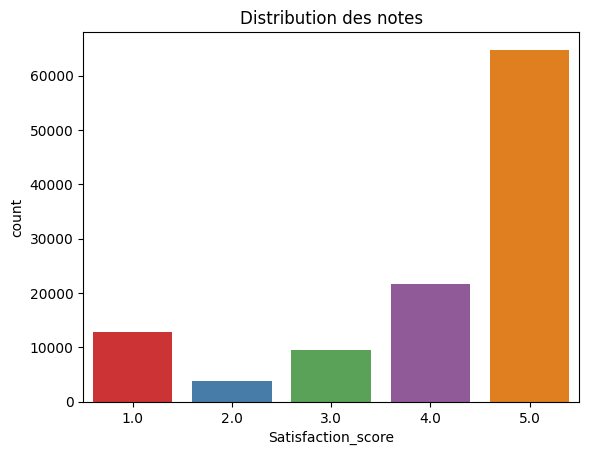

In [131]:
sns.countplot(data =data_olist, x = 'Satisfaction_score',palette = "Set1")
plt.title('Distribution des notes')
plt.show()

# 5.9 Répartition temporelle des commandes

In [132]:
orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


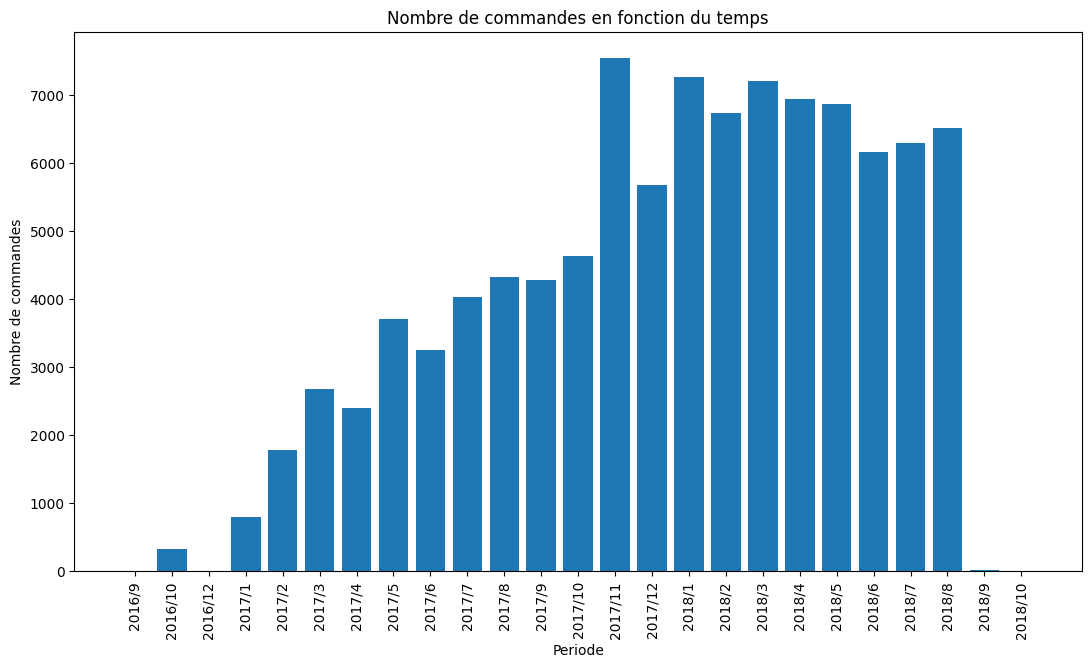

In [133]:
time = orders_dataset.loc[:, ['order_id']]
time['order_purchase_year'] = pd.to_datetime(orders_dataset[
    'order_purchase_timestamp']).dt.year
time['order_purchase_month'] = pd.to_datetime(orders_dataset[
    'order_purchase_timestamp']).dt.month

time = time.groupby(
    ['order_purchase_month', 'order_purchase_year']).count().reset_index()
time["period"] = time["order_purchase_year"].astype(str) + "/" + time[
    "order_purchase_month"].astype(str)
time.columns = ["order_purchase_month", "order_purchase_year",
                "Number of order", "period"]
time = time.sort_values(by=['order_purchase_year', 'order_purchase_month'])

# Nbre de commandes en fonction du temps
(fig, ax) = plt.subplots(figsize=(13, 7))
plt.title("Nombre de commandes en fonction du temps")
ax = plt.bar(range(0, time["period"].nunique()),
             time["Number of order"].values)
plt.xticks(range(0, time["period"].nunique()),
           time["period"].unique(), rotation=90)
plt.xlabel("Periode")
plt.ylabel("Nombre de commandes")
plt.show()

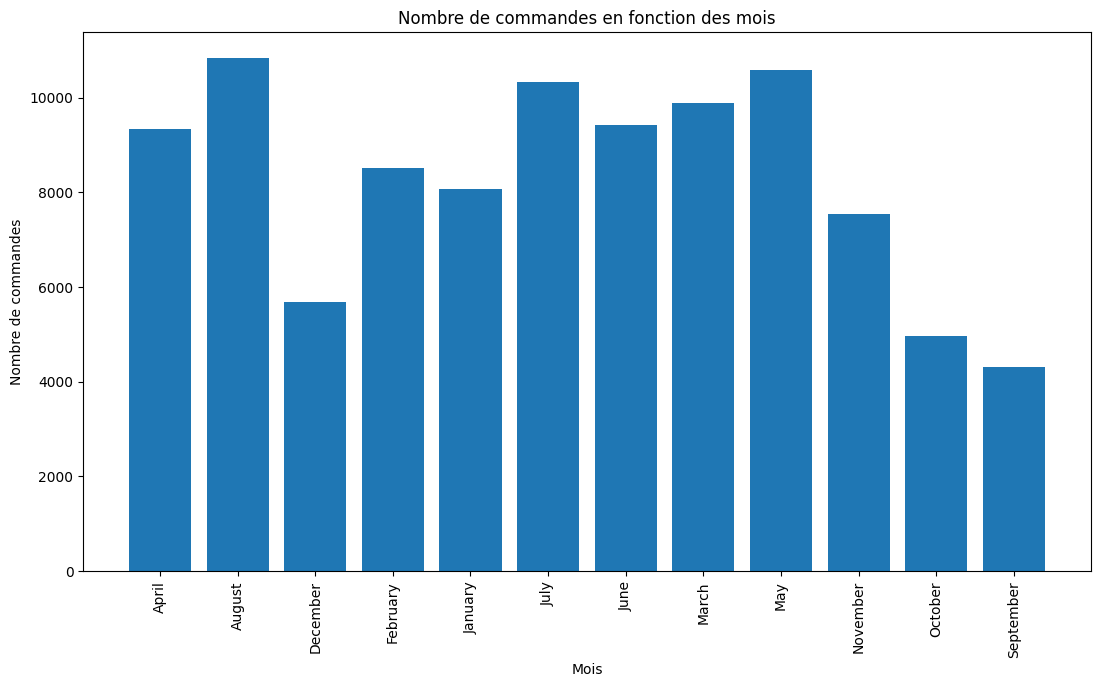

In [134]:
time_month = orders_dataset.loc[:, ['order_id']]
time_month['order_purchase_month'] = pd.to_datetime(
    orders_dataset['order_purchase_timestamp']).dt.month_name()
time_month = time_month.groupby('order_purchase_month').count().reset_index()
time_month.columns = ["order_purchase_month", "Number of order"]

# Nombre de commandes en fonction des mois
(fig, ax) = plt.subplots(figsize=(13, 7))
plt.title("Nombre de commandes en fonction des mois")
ax = plt.bar(range(0, time_month["order_purchase_month"].nunique()),
             time_month["Number of order"].values)
plt.xticks(range(0, time_month["order_purchase_month"].nunique()),
           time_month["order_purchase_month"].unique(), rotation=90)
plt.xlabel("Mois")
plt.ylabel("Nombre de commandes")
plt.show()

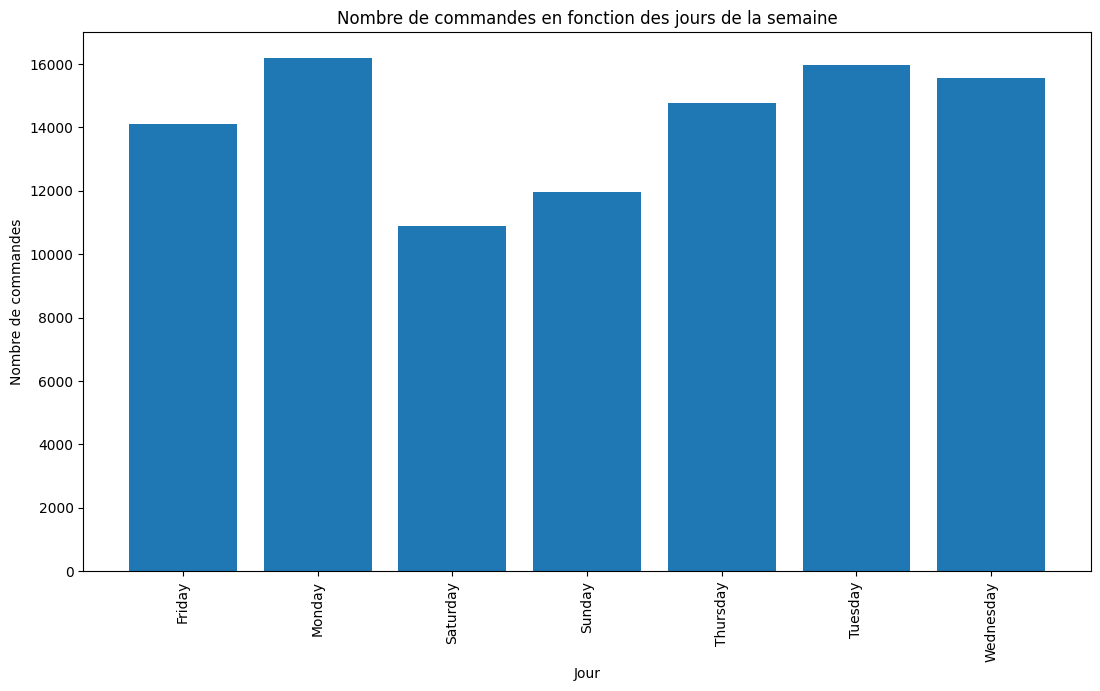

In [135]:
time_day = orders_dataset.loc[:, ['order_id']]
time_day['order_purchase_day'] = pd.to_datetime(
    orders_dataset['order_purchase_timestamp']).dt.day_name()
time_day = time_day.groupby('order_purchase_day').count().reset_index()
time_day.columns = ["order_purchase_day", "Number of order"]

# Nombre de commandes en fonction des jours de la semaine
(fig, ax) = plt.subplots(figsize=(13, 7))
plt.title("Nombre de commandes en fonction des jours de la semaine")
ax = plt.bar(range(0, time_day["order_purchase_day"].nunique()),
             time_day["Number of order"].values)
plt.xticks(range(0, time_day["order_purchase_day"].nunique()),
           time_day["order_purchase_day"].unique(), rotation=90)
plt.xlabel("Jour")
plt.ylabel("Nombre de commandes")
plt.show()

# **Partie 6 : Feature engineering**

La segmentation RFM vise à connaître les comportements d’achat de la clientèle existante et éventuellement à prédire leurs comportements ainsi que celui des prospects. Les trois paramètres retenus sont les suivants :

  - **Récence** : Durée entre une date de réference et la date de passage de la commande
    - Date_reference = la date de l'achat le plus récent .Max du variable "order_purchase_timestamp"
    - order_purchase_timestamp: date de passage de la commande
    - la date du dernier achat. On part du principe qu’une personne qui a acheté récemment chez vous a plus de chances de   
      revenir commander chez vous.

   - **Fréquence** : Le nombre fois qu'un client a commandé pendant la période d'étude.
        - le nombre d’achats réalisé sur une période donnée. Plus un client achète régulièrement chez vous, plus il y a de               chances pour qu’il achète à nouveau. On analyse ici son niveau de fidélité.
        
   - **Montant** :
     -  la somme des achats cumulés sur une période donnée. Les gros acheteurs répondent mieux que les petits. On mesure ici la         valeur client.
     -  Montant totale des achats par client pendant la période d'étude.



In [136]:
data_olist.shape

(112566, 36)

In [137]:
data_olist.columns

Index(['rfm_Frequency', 'rfm_Recency', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'Satisfaction_score',
       'review_creation_date', 'review_answer_timestamp', 'payment_type',
       'payment_installments', 'rfm_Monetry', 'Nombre_Article', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'Localisation', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_region', 'categorie_produit',
       'Delai_de_livraison', 'dernier_achat'],
      dtype='object')

 # 6.1 Création dataset clients

In [138]:
data_olist.columns

Index(['rfm_Frequency', 'rfm_Recency', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'Satisfaction_score',
       'review_creation_date', 'review_answer_timestamp', 'payment_type',
       'payment_installments', 'rfm_Monetry', 'Nombre_Article', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'Localisation', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_region', 'categorie_produit',
       'Delai_de_livraison', 'dernier_achat'],
      dtype='object')

In [139]:
#Selection des variables qui nous permettrons de creer les nouvelles variables client
data_feature=['customer_unique_id','rfm_Frequency','rfm_Monetry','rfm_Recency',
                'Localisation','Satisfaction_score','Delai_de_livraison',"Nombre_Article",'categorie_produit']
df_clients=data_olist[data_feature]



In [140]:
df_rfm_clients=df_clients.groupby('customer_unique_id').agg(
    {
        'rfm_Recency': lambda x: (Ref_data_olist - x.max()).days, 
        'rfm_Frequency': lambda x: len(x.unique()), 
        'rfm_Monetry': lambda x: x.sum(),
        "Localisation": lambda x: x.value_counts().idxmax(),
        'Satisfaction_score':lambda x: x.value_counts().idxmax()  ,
        'Delai_de_livraison':'mean',
        "Nombre_Article": lambda x: round(x.sum()),
        "categorie_produit":lambda x: x.value_counts().idxmax()  
      
      }
)    



In [141]:
df_rfm_clients.columns

Index(['rfm_Recency', 'rfm_Frequency', 'rfm_Monetry', 'Localisation',
       'Satisfaction_score', 'Delai_de_livraison', 'Nombre_Article',
       'categorie_produit'],
      dtype='object')

In [142]:
# Ajouter des  indicateurs RFM au dataframe de travail global
df_rfm_clients = pd.merge(df_rfm_clients,df, on='customer_unique_id', how='left')
df_rfm_clients.shape

(112566, 42)

In [143]:
df_rfm_clients

,customer_unique_id,rfm_Recency,rfm_Frequency,rfm_Monetry,Localisation,Satisfaction_score,Delai_de_livraison,Nombre_Article,categorie_produit,order_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,SP,5.0,6.0,1,bed_bath_table,e22acc9c116caa3f2b7121bbb380d08e,...,236.0,1.0,1500.0,34.0,7.0,32.0,13405.0,piracicaba,SP,bed_bath_table
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,SP,4.0,3.0,1,health_beauty,3594e05a005ac4d06a72673270ef9ec9,...,635.0,1.0,375.0,26.0,11.0,18.0,2215.0,sao paulo,SP,health_beauty
2,0000f46a3911fa3c0805444483337064,536,1,86.22,SC,3.0,25.0,1,stationery,b33ec3b699337181488304f362a6b734,...,177.0,3.0,1500.0,25.0,50.0,35.0,13232.0,campo limpo paulista,SP,stationery
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,PA,4.0,20.0,1,telephony,41272756ecddd9a9ed0180413cc22fb6,...,1741.0,5.0,150.0,19.0,5.0,11.0,3569.0,sao paulo,SP,telephony
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,SP,5.0,13.0,1,telephony,d957021f1127559cd947b62533f484f7,...,794.0,3.0,6050.0,16.0,3.0,11.0,12327.0,jacarei,SP,telephony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112561,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,4134.84,PE,5.0,27.0,3,health_beauty,725cf8e9c24e679a8a5a32cb92c9ce1e,...,534.0,1.0,30000.0,55.0,75.0,61.0,3908.0,sao paulo,SP,health_beauty
112562,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,BA,4.0,30.0,1,baby,c71b9252fd7b3b263aaa4cb09319a323,...,506.0,2.0,1720.0,33.0,36.0,27.0,18500.0,laranjal paulista,SP,baby
112563,ffff371b4d645b6ecea244b27531430a,567,1,112.46,MT,5.0,14.0,1,auto,fdc45e6c7555e6cb3cc0daca2557dbe1,...,716.0,5.0,600.0,17.0,15.0,13.0,30550.0,belo horizonte,MG,auto
112564,ffff5962728ec6157033ef9805bacc48,118,1,133.69,ES,5.0,11.0,1,watches_gifts,94d3ee0bc2a0af9d4fa47a4d63616e8d,...,591.0,3.0,444.0,20.0,14.0,16.0,14050.0,ribeirao preto,SP,watches_gifts


In [144]:
#Selection des variables qui nous permettrons de creer les nouvelles variables client
#data_feature=['customer_unique_id','rfm_Frequency','rfm_Monetry','rfm_Recency']
data_feat=['customer_unique_id','rfm_Frequency','rfm_Monetry','rfm_Recency','order_purchase_timestamp',
                'Localisation','Satisfaction_score','Delai_de_livraison',"Nombre_Article",'categorie_produit']
df_rfm_clients=df_rfm_clients[data_feat]

In [145]:
df_rfm_clients

,customer_unique_id,rfm_Frequency,rfm_Monetry,rfm_Recency,order_purchase_timestamp,Localisation,Satisfaction_score,Delai_de_livraison,Nombre_Article,categorie_produit
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111,2018-05-10 10:56:27,SP,5.0,6.0,1,bed_bath_table
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114,2018-05-07 11:11:27,SP,4.0,3.0,1,health_beauty
2,0000f46a3911fa3c0805444483337064,1,86.22,536,2017-03-10 21:05:03,SC,3.0,25.0,1,stationery
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,320,2017-10-12 20:29:41,PA,4.0,20.0,1,telephony
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,287,2017-11-14 19:45:42,SP,5.0,13.0,1,telephony
...,...,...,...,...,...,...,...,...,...,...
112561,fffcf5a5ff07b0908bd4e2dbc735a684,1,4134.84,446,2017-06-08 21:00:36,PE,5.0,27.0,3,health_beauty
112562,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,261,2017-12-10 20:07:56,BA,4.0,30.0,1,baby
112563,ffff371b4d645b6ecea244b27531430a,1,112.46,567,2017-02-07 15:49:16,MT,5.0,14.0,1,auto
112564,ffff5962728ec6157033ef9805bacc48,1,133.69,118,2018-05-02 15:17:41,ES,5.0,11.0,1,watches_gifts


In [146]:
df_rfm_clients.shape

(112566, 10)

In [147]:
print("La liste des Features Engineering :")
list(df_rfm_clients.columns)

La liste des Features Engineering :


['customer_unique_id',
 'rfm_Frequency',
 'rfm_Monetry',
 'rfm_Recency',
 'order_purchase_timestamp',
 'Localisation',
 'Satisfaction_score',
 'Delai_de_livraison',
 'Nombre_Article',
 'categorie_produit']

# 6.2 Suppression des doublons


In [148]:
#suppression des doublons
df_rfm_clients.drop_duplicates(inplace=True)
df_rfm_clients.shape

(94232, 10)

In [149]:
df_rfm_clients.to_csv('data_olist_rfm.csv')

# **Partie 7 : Analyse univariée**

# 7.1 Identification des variables qualitatives & quantitatives

In [150]:
df_rfm_clients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94232 entries, 0 to 112565
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_unique_id        94232 non-null  object 
 1   rfm_Frequency             94232 non-null  int64  
 2   rfm_Monetry               94232 non-null  float64
 3   rfm_Recency               94232 non-null  int64  
 4   order_purchase_timestamp  94232 non-null  object 
 5   Localisation              94232 non-null  object 
 6   Satisfaction_score        94232 non-null  float64
 7   Delai_de_livraison        94224 non-null  float64
 8   Nombre_Article            94232 non-null  int64  
 9   categorie_produit         94232 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 7.9+ MB


In [151]:
# Types de variables
df_rfm_clients.dtypes.value_counts()

object     4
int64      3
float64    3
Name: count, dtype: int64

In [152]:
# Liste des variables quantitatives 
num_data_clients = df_rfm_clients.select_dtypes(include='number').columns.tolist()
print("Les variables numériques sont: ", num_data_clients)


Les variables numériques sont:  ['rfm_Frequency', 'rfm_Monetry', 'rfm_Recency', 'Satisfaction_score', 'Delai_de_livraison', 'Nombre_Article']


In [153]:
# Liste des variables qualitatives
cat_data_clients =df_rfm_clients.select_dtypes(include='object').columns.tolist()
print("Les variables categorielles sont: ",cat_data_clients)

Les variables categorielles sont:  ['customer_unique_id', 'order_purchase_timestamp', 'Localisation', 'categorie_produit']


# 7.2 La distribution des variables quantitatives

In [154]:
df_rfm_clients.describe()

,rfm_Frequency,rfm_Monetry,rfm_Recency,Satisfaction_score,Delai_de_livraison,Nombre_Article
count,94232.00000,94232.000000,94232.000000,94232.000000,94224.000000,94232.000000
mean,1.07108,222.133112,235.372506,4.156879,12.046016,1.551755
std,0.35742,667.346918,152.387559,1.284634,9.395892,2.687246
min,1.00000,8.860000,0.000000,1.000000,0.000000,1.000000
25%,1.00000,64.530000,112.000000,4.000000,6.000000,1.000000
50%,1.00000,115.360000,216.000000,5.000000,10.000000,1.000000
75%,1.00000,209.895000,343.000000,5.000000,15.000000,1.000000
max,14.00000,109312.640000,694.000000,5.000000,208.000000,231.000000


In [155]:
def Analyse_Univarie(data,Data_Target) :

        for col in  Data_Target:

            plt.figure(figsize=(15,20))
            plt.subplot(5,2,5)
            Mean = round(data[col].mean(), 2)
            Median = round(data[col].median(), 2)
            Min = round(data[col].min(), 2)
            Max = round(data[col].max(), 2) 
            Skewness = round(data[col].skew(), 2)
            Kurtosis = round(data[col].kurtosis(), 2)
            print(f"{col}:\nMean:{Mean}\nMedian:{Median}\nMin:{Min}\nMax:{Max}\nSkewness:{Skewness}\nKurtosis:{Kurtosis}\n")
            print("========================================================================================================")
            
            sns.boxplot(x=data[col],width=0.5,color='SteelBlue')
            plt.title("Boite à moustache")
            #plt.ylabel('taux d\'utilisation d\'internet %')
            plt.axvline(Mean,color='blue',label='mean')
            plt.axvline(Median,color='red',label='median')
            plt.axvline(Min,color='green',label='min')
            plt.axvline(Max,color='purple',label='max')
            plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
            plt.legend(loc='upper right')

            plt.subplot(5,2,6)
            sns.histplot(x=data[col],kde=True,color='SteelBlue')
            plt.title("Distribution des variables")

            plt.axvline(Mean,color='blue',label='mean')
            plt.axvline(Median,color='red',label='median')
            plt.axvline(Min,color='green',label='min')
            plt.axvline(Max,color='purple',label='max')
            plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
            sns.distplot(data[col], label="skew: " + str(np.round(data[col].skew(),2)))
            sns.distplot(data[col], label="kurtosis: " + str(np.round(data[col].kurtosis(),2)))
            plt.legend(loc='upper right')

In [156]:
num_data_clients

['rfm_Frequency',
 'rfm_Monetry',
 'rfm_Recency',
 'Satisfaction_score',
 'Delai_de_livraison',
 'Nombre_Article']

rfm_Recency:
Mean:235.37
Median:216.0
Min:0
Max:694
Skewness:0.46
Kurtosis:-0.65

rfm_Frequency:
Mean:1.07
Median:1.0
Min:1
Max:14
Skewness:12.52
Kurtosis:316.66

rfm_Monetry:
Mean:222.13
Median:115.36
Min:8.86
Max:109312.64
Skewness:62.5
Kurtosis:8221.73



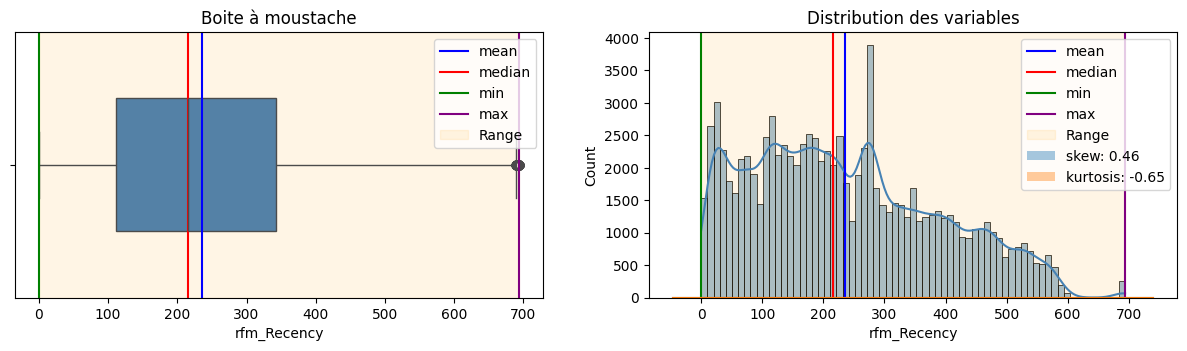

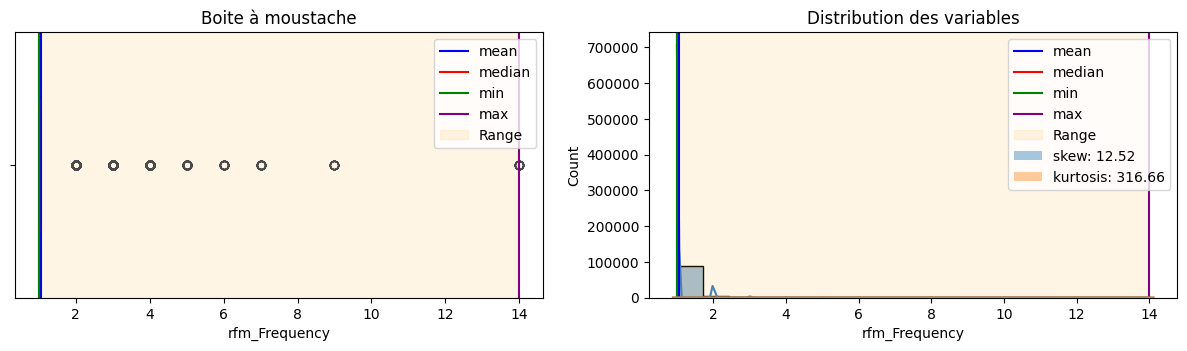

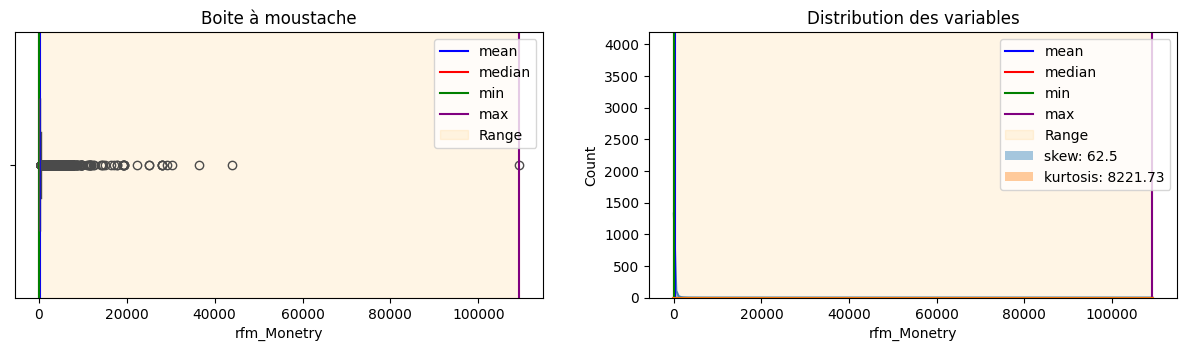

In [157]:
Analyse_Univarie(df_rfm_clients,['rfm_Recency','rfm_Frequency','rfm_Monetry'])

Satisfaction_score:
Mean:4.16
Median:5.0
Min:1.0
Max:5.0
Skewness:-1.48
Kurtosis:0.96

Delai_de_livraison:
Mean:12.05
Median:10.0
Min:0.0
Max:208.0
Skewness:3.81
Kurtosis:39.35

Nombre_Article:
Mean:1.55
Median:1.0
Min:1
Max:231
Skewness:26.57
Kurtosis:1424.18



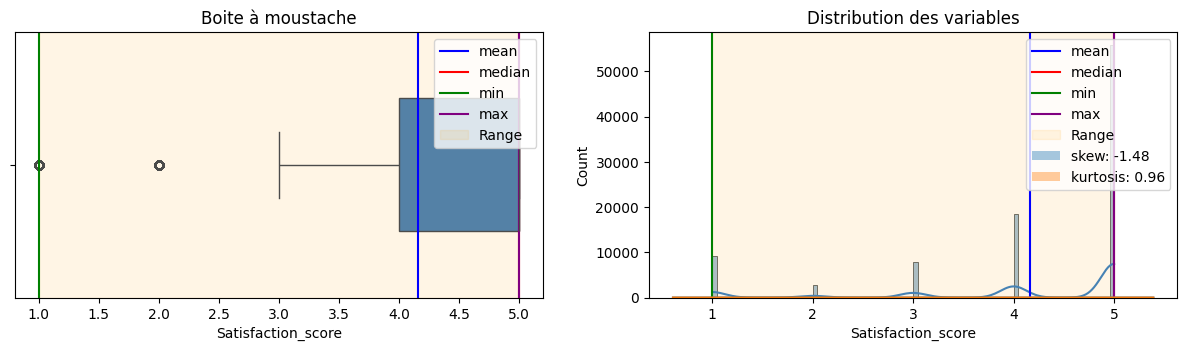

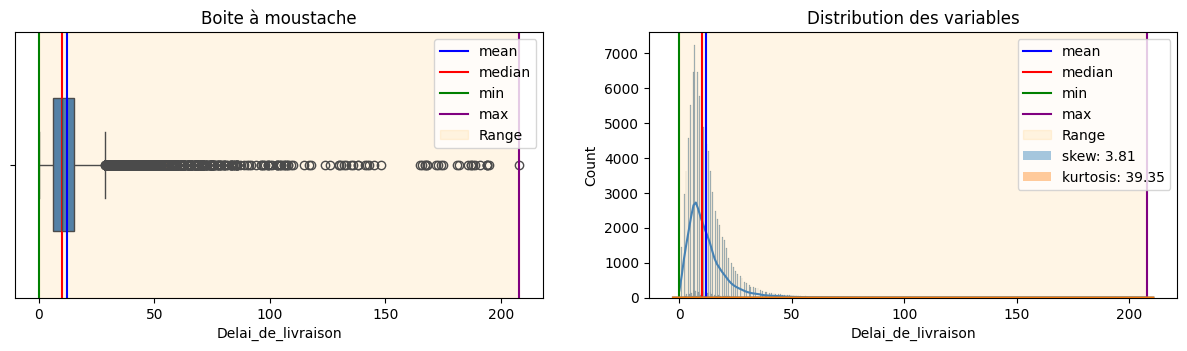

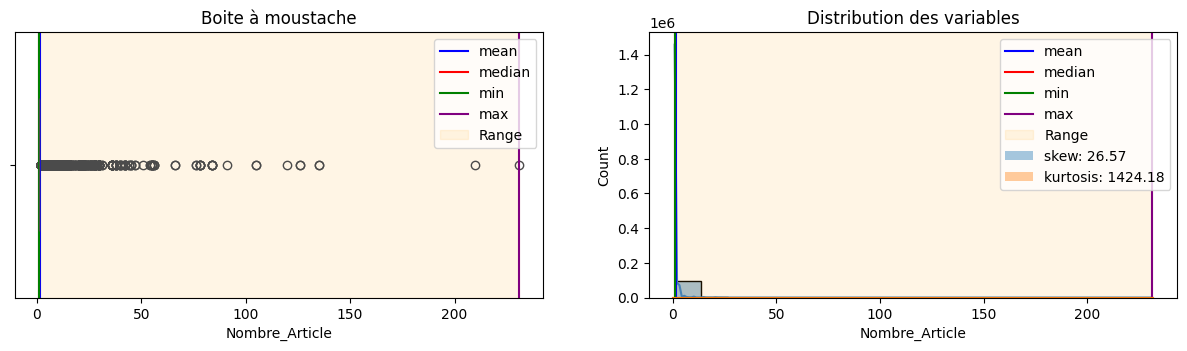

In [158]:
Analyse_Univarie(df_rfm_clients,['Satisfaction_score','Delai_de_livraison','Nombre_Article'])

# 7.2 Suppression des outliers

In [159]:
#fonction de suppression des outliers 
def del_outliers(df, cols):
    temp = df.copy()
    i_outliers = [] #list of indexs for each column
    outliers = [] #list with all the indexs
    for col in cols:
        i_outliers.append(temp[temp[col] > temp[col].quantile(0.99)].index.tolist())
        i_outliers.append(temp[temp[col] < temp[col].quantile(0.01)].index.tolist())

    for i_col in i_outliers:
        for i in i_col:
            outliers.append(i)
        
    temp[temp.index.isin(outliers)] = np.nan #convert the outliers into nan
    return temp.dropna() #drop the rows with the nan (outliers)

In [160]:
df_rfm_clients.shape

(94232, 10)

In [161]:
#suppression des outliers de nos tables
df_rfm_clients=del_outliers(df_rfm_clients,num_data_clients)

In [162]:
df_rfm_clients.shape

(88887, 10)

# 7.3 Normalisation des variables quantitatives 

In [163]:
def data_log (data,target) :
    
    for column in target :
        data['Log_' +column]=data[column].apply(lambda x : np.log(1 + x))
        
    return data

In [164]:
data_log(df_rfm_clients,num_data_clients)

,customer_unique_id,rfm_Frequency,rfm_Monetry,rfm_Recency,order_purchase_timestamp,Localisation,Satisfaction_score,Delai_de_livraison,Nombre_Article,categorie_produit,Log_rfm_Frequency,Log_rfm_Monetry,Log_rfm_Recency,Log_Satisfaction_score,Log_Delai_de_livraison,Log_Nombre_Article
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,141.90,111.0,2018-05-10 10:56:27,SP,5.0,6.0,1.0,bed_bath_table,0.693147,4.962145,4.718499,1.791759,1.945910,0.693147
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.19,114.0,2018-05-07 11:11:27,SP,4.0,3.0,1.0,health_beauty,0.693147,3.338967,4.744932,1.609438,1.386294,0.693147
2,0000f46a3911fa3c0805444483337064,1.0,86.22,536.0,2017-03-10 21:05:03,SC,3.0,25.0,1.0,stationery,0.693147,4.468434,6.285998,1.386294,3.258097,0.693147
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,43.62,320.0,2017-10-12 20:29:41,PA,4.0,20.0,1.0,telephony,0.693147,3.798182,5.771441,1.609438,3.044522,0.693147
4,0004aac84e0df4da2b147fca70cf8255,1.0,196.89,287.0,2017-11-14 19:45:42,SP,5.0,13.0,1.0,telephony,0.693147,5.287711,5.662960,1.791759,2.639057,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112559,fffb09418989a0dbff854a28163e47c6,1.0,73.16,254.0,2017-12-17 19:14:35,RS,5.0,8.0,1.0,watches_gifts,0.693147,4.306225,5.541264,1.791759,2.197225,0.693147
112562,fffea47cd6d3cc0a88bd621562a9d061,1.0,84.58,261.0,2017-12-10 20:07:56,BA,4.0,30.0,1.0,baby,0.693147,4.449452,5.568345,1.609438,3.433987,0.693147
112563,ffff371b4d645b6ecea244b27531430a,1.0,112.46,567.0,2017-02-07 15:49:16,MT,5.0,14.0,1.0,auto,0.693147,4.731450,6.342121,1.791759,2.708050,0.693147
112564,ffff5962728ec6157033ef9805bacc48,1.0,133.69,118.0,2018-05-02 15:17:41,ES,5.0,11.0,1.0,watches_gifts,0.693147,4.902976,4.779123,1.791759,2.484907,0.693147


In [165]:
df_rfm_clients.to_csv('df_olist_clients.csv')

In [166]:
df_rfm_clients.drop(columns=num_data_clients, inplace=True)

In [167]:
df_rfm_clients.shape

(88887, 10)

In [168]:
df_rfm_clients

,customer_unique_id,order_purchase_timestamp,Localisation,categorie_produit,Log_rfm_Frequency,Log_rfm_Monetry,Log_rfm_Recency,Log_Satisfaction_score,Log_Delai_de_livraison,Log_Nombre_Article
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,SP,bed_bath_table,0.693147,4.962145,4.718499,1.791759,1.945910,0.693147
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,SP,health_beauty,0.693147,3.338967,4.744932,1.609438,1.386294,0.693147
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,SC,stationery,0.693147,4.468434,6.285998,1.386294,3.258097,0.693147
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,PA,telephony,0.693147,3.798182,5.771441,1.609438,3.044522,0.693147
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,SP,telephony,0.693147,5.287711,5.662960,1.791759,2.639057,0.693147
...,...,...,...,...,...,...,...,...,...,...
112559,fffb09418989a0dbff854a28163e47c6,2017-12-17 19:14:35,RS,watches_gifts,0.693147,4.306225,5.541264,1.791759,2.197225,0.693147
112562,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,BA,baby,0.693147,4.449452,5.568345,1.609438,3.433987,0.693147
112563,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,MT,auto,0.693147,4.731450,6.342121,1.791759,2.708050,0.693147
112564,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,ES,watches_gifts,0.693147,4.902976,4.779123,1.791759,2.484907,0.693147


In [169]:
# Liste des variables quantitatives 
Log_num_data_client = df_rfm_clients.select_dtypes(include='number').columns.tolist()
print("Les variables numériques sont: ", Log_num_data_client)

Les variables numériques sont:  ['Log_rfm_Frequency', 'Log_rfm_Monetry', 'Log_rfm_Recency', 'Log_Satisfaction_score', 'Log_Delai_de_livraison', 'Log_Nombre_Article']


Log_rfm_Recency:
Mean:5.17
Median:5.38
Min:2.2
Max:6.35
Skewness:-1.1
Kurtosis:0.74

Log_rfm_Frequency:
Mean:0.71
Median:0.69
Min:0.69
Max:1.1
Skewness:4.13
Kurtosis:15.02

Log_rfm_Monetry:
Mean:4.81
Median:4.75
Min:3.17
Max:7.49
Skewness:0.5
Kurtosis:-0.06



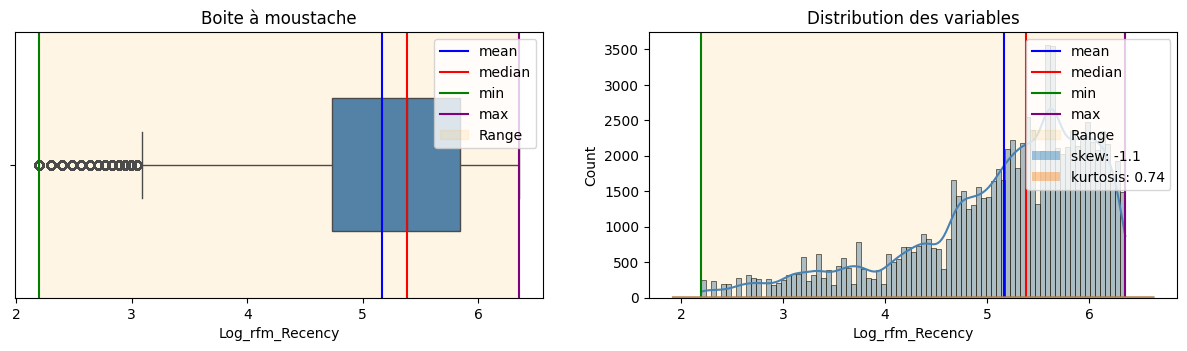

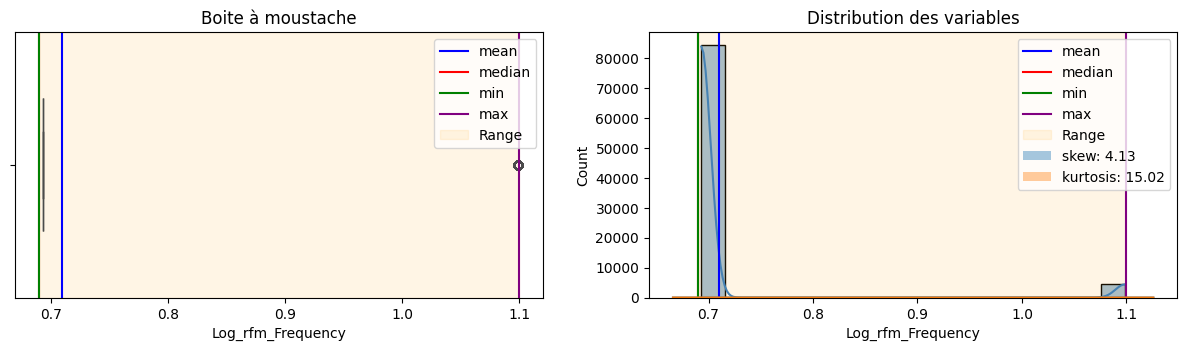

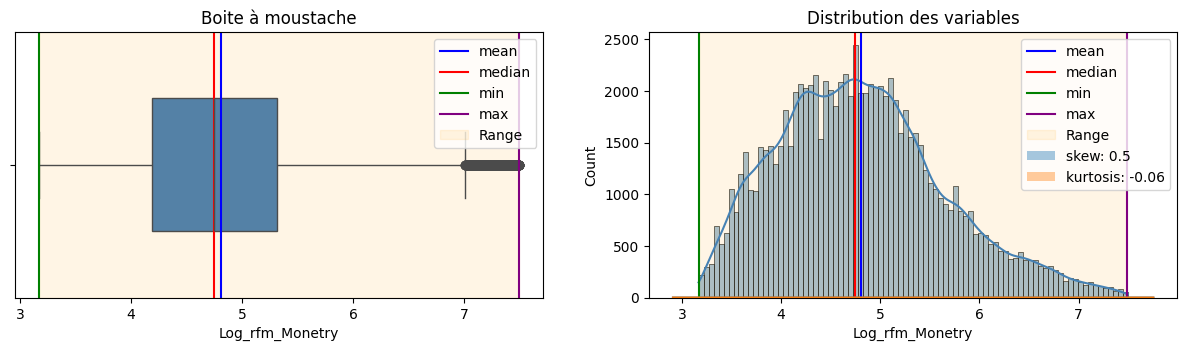

In [170]:
Analyse_Univarie(df_rfm_clients,['Log_rfm_Recency', 'Log_rfm_Frequency', 'Log_rfm_Monetry'])

Log_Satisfaction_score:
Mean:1.6
Median:1.79
Min:0.69
Max:1.79
Skewness:-1.93
Kurtosis:2.55

Log_Delai_de_livraison:
Mean:2.36
Median:2.4
Min:0.69
Max:3.83
Skewness:-0.25
Kurtosis:-0.0

Log_Nombre_Article:
Mean:0.8
Median:0.69
Min:0.69
Max:2.4
Skewness:2.77
Kurtosis:7.91



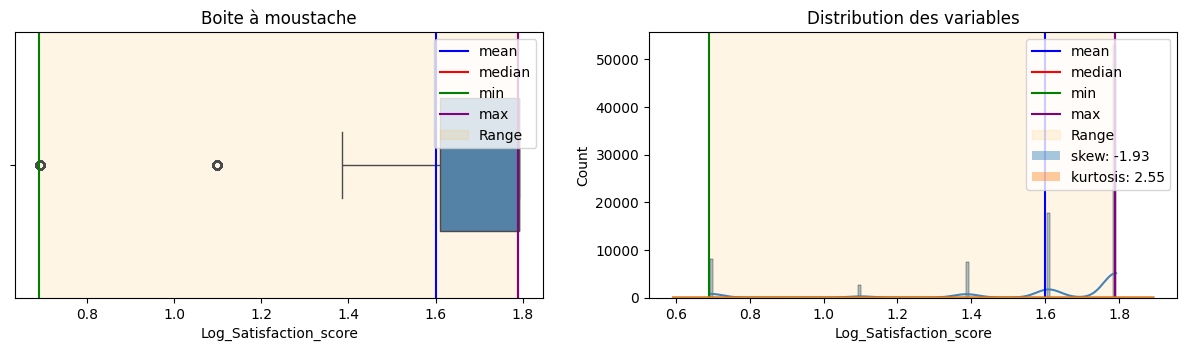

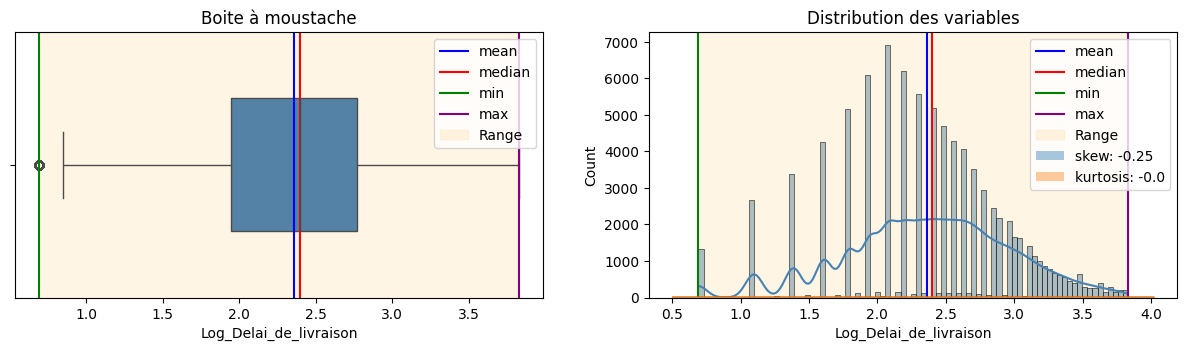

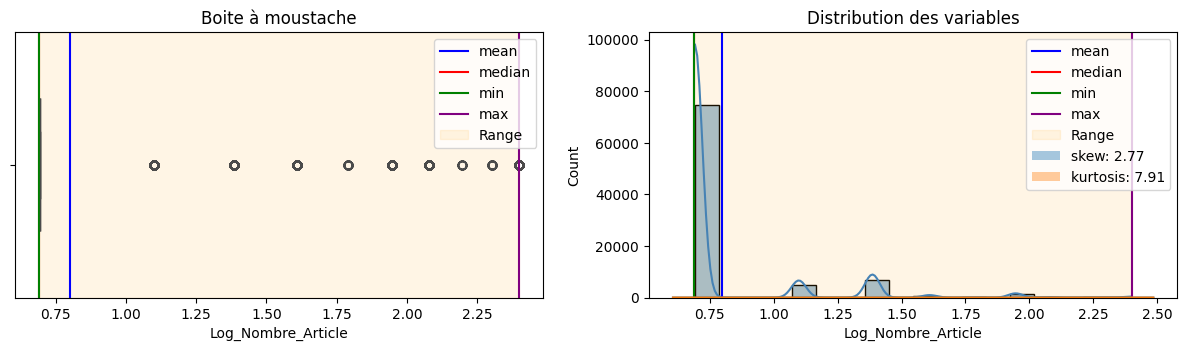

In [171]:
Analyse_Univarie(df_rfm_clients,['Log_Satisfaction_score','Log_Delai_de_livraison', 'Log_Nombre_Article'])

# 7.4 La matrice de correlation

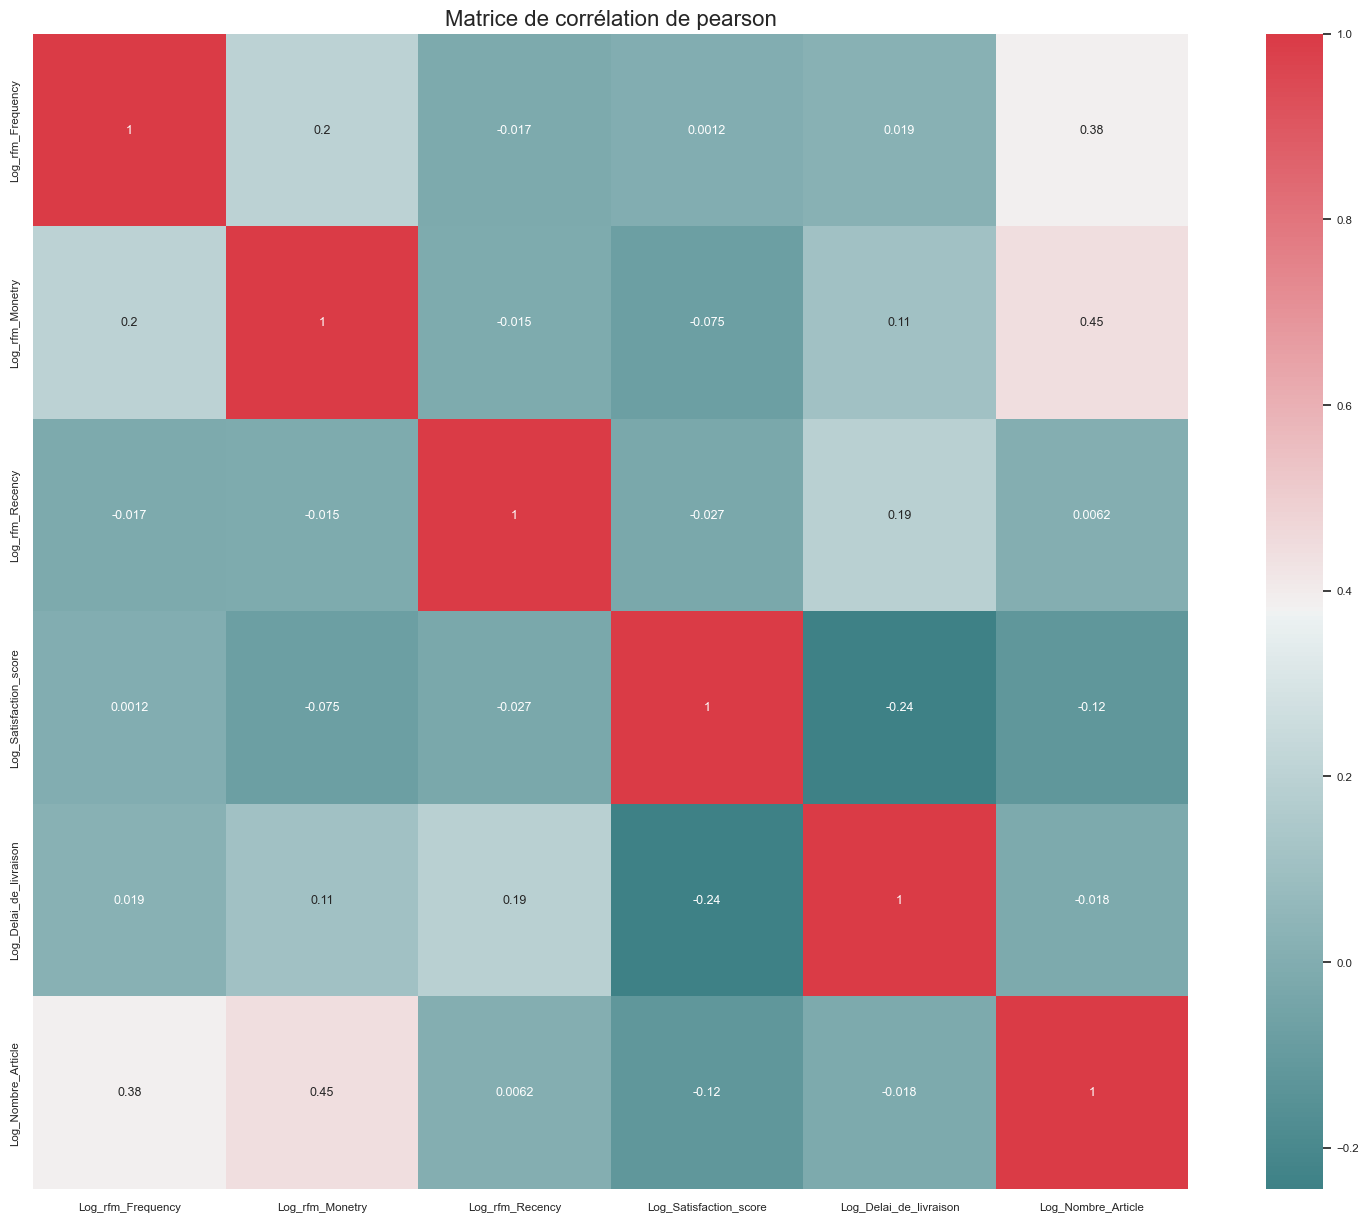

In [172]:
df_feats = df_rfm_clients.select_dtypes(include='number').columns.tolist()

# Répresentation graphique de la matrice de corrélation
sns.set(font_scale=0.75)
fig, ax = plt.subplots(figsize=(20,15)) 
matrice_correlation = np.triu(df_rfm_clients[df_feats].corr())

sns.heatmap( df_rfm_clients[df_feats].corr(),annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True),square=True)
plt.title('Matrice de corrélation de pearson', size=16)
plt.show()

In [173]:
df_rfm_clients.describe()

,Log_rfm_Frequency,Log_rfm_Monetry,Log_rfm_Recency,Log_Satisfaction_score,Log_Delai_de_livraison,Log_Nombre_Article
count,88887.000000,88887.000000,88887.000000,88887.000000,88887.000000,88887.000000
mean,0.713451,4.808738,5.166784,1.601382,2.364706,0.804508
std,0.088432,0.840025,0.895240,0.328423,0.606941,0.280455
min,0.693147,3.168845,2.197225,0.693147,0.693147,0.693147
25%,0.693147,4.189655,4.736198,1.609438,1.945910,0.693147
50%,0.693147,4.747624,5.384495,1.791759,2.397895,0.693147
75%,0.693147,5.317262,5.837730,1.791759,2.772589,0.693147
max,1.098612,7.494992,6.354370,1.791759,3.828641,2.397895


# **Partie 8 : Sauvegarde des données features dans un nouveau CSV**

In [174]:
df_rfm_clients.shape

(88887, 10)

In [175]:
df_rfm_clients.to_csv('df_rfm_clients.csv')

In [176]:
df_rfm_clients.columns

Index(['customer_unique_id', 'order_purchase_timestamp', 'Localisation',
       'categorie_produit', 'Log_rfm_Frequency', 'Log_rfm_Monetry',
       'Log_rfm_Recency', 'Log_Satisfaction_score', 'Log_Delai_de_livraison',
       'Log_Nombre_Article'],
      dtype='object')